AIM OF THIS PROJECT:-    In this project, we aim to predict the most favorable restaurant locations in Bangalore based on customer ratings, which will be helpful for decision-making for restaurant owners and investors.

# Importing the Necessary Libraries

In [1]:
import pandas as pd  #we use pandas to manipulate the data

import numpy as np   #NumPy is used to perform a variety of mathematical operations/calculation on arrays.

import matplotlib.pyplot as plt #Matplotlib is used for data visualization library
    
import seaborn as sns     #Seaborn is a Python data visualization library built on top of matplotlib. 
                                   #It provides a high-level interface for ploting attractive and informative statistical graphics.
    
from warnings import filterwarnings  # filter the Warning and ignore it
filterwarnings('ignore')

# Loading the Dataset¶

In [2]:
df=pd.read_csv("zomato.csv")     # here it is reading the data from zomato dataset using pandans
df.head()          #this gives the top 5 records

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.tail()               #gives the last 5 records

url  \
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes           phone                    location  \
51712         No  3.6 /5     27    080 40301477                  Whitefield   
51713         No     NaN      0  +91 8197675843                  Whitefield   
51714         No     NaN      0             NaN                  Whitefield   
51715        Yes  4.3 /5    236    080 49652769  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  +91 8071117272  ITPL Main Road, Whitefield   

                rest_type                    dish_liked  \
51712                 Bar                           NaN   
51713                 Bar                           NaN   
51714                 Bar                           NaN   
51715                 Bar  Cocktails, Pizza, Buttermilk   
51716  Bar, Casual Dining                           NaN   

                                     cuisines approx_cost(for two people)  \
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
51712  [('Rated 5.0', "RATED\n  Food and service are ...        []   
51713                                                 []        []   
51714                                                 []        []   
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...        []   
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...        []   

      listed_in(type) listed_in(city)  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield

In [4]:
df.columns        #checking columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Columns description
1.url contains the url of the restaurant in the zomato website

2.address contains the address of the restaurant in Bengaluru

3.name contains the name of the restaurant

4.online_order whether online ordering is available in the restaurant or not

5.book_table table book option available or not

6.rate contains the overall rating of the restaurant out of 5

7.votes contains total number of rating for the restaurant as of the above mentioned date

8.phone contains the phone number of the restaurant

9.location contains the neighborhood in which the restaurant is located

10.rest_type restaurant type

11.dish_liked dishes people liked in the restaurant

12.cuisines food styles, separated by comma

13.approx_cost(for two people) contains the approximate cost of meal for two people

14.reviews_list list of tuples containing reviews for the restaurant, each tuple

15.menu_item contains list of menus available in the restaurant

16.listed_in(type) type of meal

17.listed_in(city) contains the neighborhood in which the restaurant is listed

In [5]:
df.shape                #shape gives the total number of rows and columns

(51717, 17)

In [6]:
df.info()               #this gives the information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# EDA [Exploratory Data Analysis]


#### Removing unnecessary columns 

##### Checking menu_item column

In [7]:
df['menu_item'].head()      # this column does't have any information

0    []
1    []
2    []
3    []
4    []
Name: menu_item, dtype: object

In [8]:
df['menu_item'].unique()      #will give the unique values

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [9]:
df[df['menu_item']=="[]"].shape              #will show how many records have empty []

(39617, 17)

This column is not useful as it has many null values

##### Checking dish_liked column

In [10]:
df.dish_liked.head(2)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
Name: dish_liked, dtype: object

In [11]:
df.dish_liked.unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [12]:
df.dish_liked.value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

In [13]:
for entry in df['dish_liked']:
    if pd.notna(entry):        # Check if the entry is not null
        categories = entry.split(', ')
        for category in categories:
            print(category)

Pasta
Lunch Buffet
Masala Papad
Paneer Lajawab
Tomato Shorba
Dum Biryani
Sweet Corn Soup
Momos
Lunch Buffet
Chocolate Nirvana
Thai Green Curry
Paneer Tikka
Dum Biryani
Chicken Biryani
Churros
Cannelloni
Minestrone Soup
Hot Chocolate
Pink Sauce Pasta
Salsa
Veg Supreme Pizza
Masala Dosa
Panipuri
Gol Gappe
Onion Rings
Pasta
Kadhai Paneer
Salads
Salad
Roti
Jeera Rice
Farmhouse Pizza
Chocolate Banana
Virgin Mojito
Pasta
Paneer Tikka
Lime Soda
Prawn Pizza
Pizza
Mocktails
Coffee
Nachos
Salad
Pasta
Sandwiches
Waffles
Pasta
Coleslaw Sandwich
Choco Waffle
Tacos
Momos
Cheese Nachos
Waffles
Pasta
Crispy Chicken
Honey Chilli Chicken
Sandwich
Coffee
Crepe
Mocktails
Peri Fries
Lasagne
Pizza
Chicken Bbq Wings
Virgin Mojito
Nachos
Coffee
Spaghetti
Pancakes
Nachos
Pasta
Sandwich
Garlic Bread
Sandwich
Omelette
Ice Tea
Virgin Mojito
Hot Chocolate
Pasta Arrabiata
Hazelnut Cappuccino
Churros
Cannelloni
Minestrone Soup
Hot Chocolate
Pink Sauce Pasta
Salsa
Veg Supreme Pizza
Garlic Bread
Burgers
Sandwiches
Piz

In [14]:
df.dish_liked.value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

In [15]:
df.dish_liked.isnull().sum()          # this column has lots of null values 

28078

In [16]:
data=df.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

# we are droping all the columns which is not giving valuable columns

data.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

  approx_cost(for two people) listed_in(type)  
0                         800          Buffet  
1                         800          Buffet  
2                         800          Buffet  
3                         300          Buffet  
4                         600          Buffet

### Checking information about data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [18]:
data.shape 

(51717, 10)

### Checking duplicate

In [19]:
data.duplicated()     # checking duplicates records

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [20]:
data[data.duplicated()]      # to see the duplicate records which we have

name online_order book_table  \
596                                     My Tea House          Yes        Yes   
2235                                      Shiv Sagar           No         No   
2482                                   Grand Village           No         No   
2483                                 Timepass Dinner          Yes         No   
2488                                           Jalsa          Yes        Yes   
...                                              ...          ...        ...   
51633  Re:fuel- Aloft Bengaluru Cessna Business Park           No         No   
51637                                     The Crunch           No         No   
51639                                      Kale Cafe           No         No   
51642                         Basaveshwara Khanavali           No         No   
51679             Unlock - The Restobar - Keys Hotel           No         No   

         rate  votes           location      rest_type  \
596       NEW      0       Banashankari  Casual Dining   
2235    3.6/5     10  Bannerghatta Road     Food Court   
2482    3.8/5    166       Basavanagudi  Casual Dining   
2483    3.8/5    286       Basavanagudi  Casual Dining   
2488    4.1/5    775       Banashankari  Casual Dining   
...       ...    ...                ...            ...   
51633     NaN      0          Bellandur   Cafe, Bakery   
51637  3.3 /5      6        Brookefield  Beverage Shop   
51639     NaN      0        Brookefield    Quick Bites   
51642     NaN      0        Brookefield    Quick Bites   
51679  3.7 /5     32         Whitefield         Lounge   

                                                cuisines  \
596                Continental, Asian, North Indian, Tea   
2235                             South Indian, Beverages   
2482                            North Indian, Rajasthani   
2483                                        North Indian   
2488                      North Indian, Mughlai, Chinese   
...                                                  ...   
51633  Bakery, Beverages, Cafe, Coffee, Desserts, San...   
51637                                          Beverages   
51639                                  Fast Food, Kerala   
51642                                       South Indian   
51679                                        Finger Food   

      approx_cost(for two people)     listed_in(type)  
596                           500            Dine-out  
2235                          400            Dine-out  
2482                          600              Buffet  
2483                          600              Buffet  
2488                          800              Buffet  
...                           ...                 ...  
51633                       1,000            Dine-out  
51637                         300            Dine-out  
51639                         100            Dine-out  
51642                         200            Dine-out  
51679                       2,000  Drinks & nightlife  

[16706 rows x 10 columns]

### Droping the duplicates 

In [21]:
data.drop_duplicates(keep='first',inplace=True)   # inplace is true means it effect original data

In [22]:
data.shape              #as we have droped the duplicate values the records are now see

(35011, 10)

##### Checking the null values 

In [23]:
data.isnull().sum()   #to check whether the data has null value or not and if it has null records then we should count the records

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [24]:
null_values = {i:data[i].isnull().sum() for i in data.columns}  #alternative way to check the sum of the null values but the only difference is in this the output will be in dictionary format
null_values

{'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 3770,
 'votes': 0,
 'location': 14,
 'rest_type': 156,
 'cuisines': 33,
 'approx_cost(for two people)': 221,
 'listed_in(type)': 0}

In [25]:
empty_data = data.isnull().sum()        #I want to show null value only
empty_data[empty_data>0]

rate                           3770
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
dtype: int64

In [26]:
data[data.isnull().any(axis=1)]         #It shows the all null values

name online_order  \
84                                             Chill Out           No   
90                                        Me And My Cake           No   
91                                               Sunsadm           No   
92                                Annapooraneshwari Mess           No   
107                                        Coffee Shopee           No   
...                                                  ...          ...   
51644                                     Punjabi Thadka           No   
51675                                       Topsy Turvey           No   
51710                                       Topsy Turvey           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   

      book_table rate  votes      location           rest_type  \
84            No  NaN      0  Banashankari         Quick Bites   
90            No  NaN      0  Banashankari            Delivery   
91            No  NaN      0  Banashankari  Takeaway, Delivery   
92            No  NaN      0  Banashankari                Mess   
107           No  NaN      0  Banashankari  Takeaway, Delivery   
...          ...  ...    ...           ...                 ...   
51644         No  NaN      0   Brookefield         Quick Bites   
51675         No  NaN      0    Whitefield                 Bar   
51710         No  NaN      0    Whitefield                 Bar   
51713         No  NaN      0    Whitefield                 Bar   
51714         No  NaN      0    Whitefield                 Bar   

                    cuisines approx_cost(for two people)     listed_in(type)  
84     South Indian, Chinese                         100            Delivery  
90          Bakery, Desserts                         500            Delivery  
91              South Indian                         400            Delivery  
92              South Indian                         200            Delivery  
107                Beverages                         250            Delivery  
...                      ...                         ...                 ...  
51644           North Indian                         400            Dine-out  
51675            Finger Food                         900  Drinks & nightlife  
51710            Finger Food                         900       Pubs and bars  
51713            Finger Food                         600       Pubs and bars  
51714            Finger Food                       2,000       Pubs and bars  

[4053 rows x 10 columns]

### Visualization of null values by using heatmap

<Axes: >

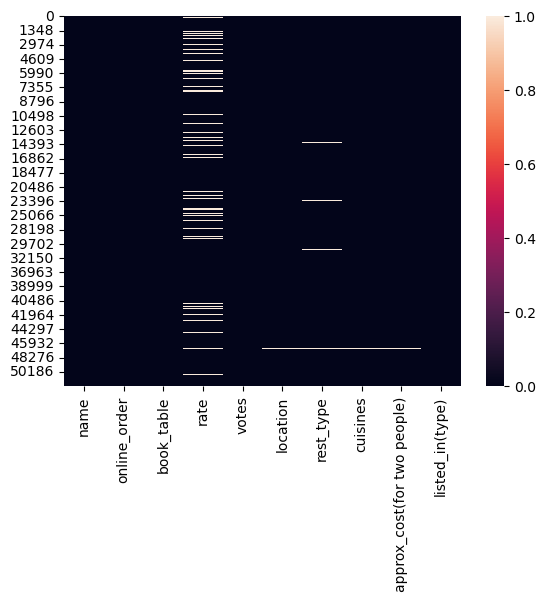

In [27]:
sns.heatmap(data.isnull())

## Treating the null values in each columns

### Cleaning the Rate column

In [28]:
print("There are {} values are unique in Rate Columns".format(len(data["rate"].unique())))
                                #it gives the length of the unique value in the rate column

data["rate"].unique()          #it will show unique value in the rate column

There are 65 values are unique in Rate Columns


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### I have noted that I want to change object datatype to float datatype and some string value "NEW","-"  to null value and I don't want that "/5" so we will also remove "/5"

In [29]:

def rate(data):                          #here we are defining a function(also called as user-defined function) and we have given the function name is rate
    if data == "NEW" or data == "-":     #if any columns have "NEW" or "-" then it will convert it to null
        return np.nan                    #np.nan stands for not a number and is defined as a substitute for declaring value
                                                   #which are numerical values that are missing values in an array 
    else:                                   
        data = str(data).split("/")       # I am spliting the data by "/"
        data = data[0]                     #here we just want the 0th index position
        return float(data)                  #it will return float

In [30]:
data["rate"]= data["rate"].apply(rate) #here we can see i removed "/5" and i converted object to float because i should float type not object

In [31]:
data["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

<Axes: >

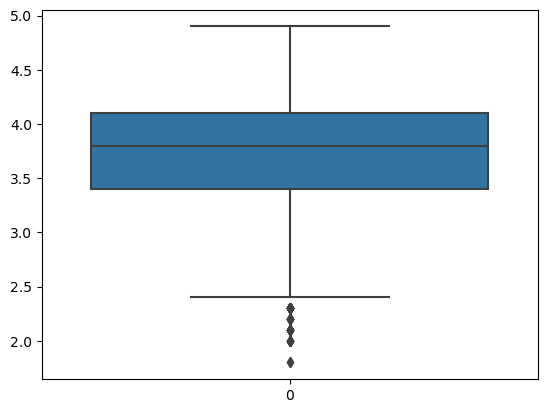

In [32]:
sns.boxplot(data.rate) # I want to see wheather my column has extreme outliers or not so that we can decide if the column's data is good 

In [33]:
data["rate"].value_counts().index

Float64Index([3.9, 3.8, 3.7, 4.0, 4.1, 3.6, 3.5, 4.2, 3.4, 3.3, 4.3, 3.2, 3.1,
              4.4, 3.0, 4.5, 2.9, 2.8, 4.6, 2.7, 2.6, 4.7, 2.5, 4.8, 2.4, 4.9,
              2.3, 2.1, 2.2, 2.0, 1.8],
             dtype='float64')

In [34]:
#Now replace null value with the mean value that will complete rate column

data["rate"] = data["rate"].fillna(data["rate"].mean())     #fillna will fill all the null values

### Rate column has zero null values now

In [35]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

#### Now we are treating the null values of rest_type column

In [36]:
data.rest_type.nunique()           #nunique gives the number of unique values

93

In [37]:
data[data.rest_type.isna()]                

name online_order book_table      rate  votes  \
999          Mughlai Kitchen          Yes         No  3.500000    269   
1300    Eat & Joy Restaurant          Yes         No  3.000000      7   
1376     Kababish Restaurant          Yes         No  3.600000     15   
1565      Goli Vada Pav No 1           No         No  3.730491      0   
1637          Ammi's Biryani           No         No  2.400000    392   
...                      ...          ...        ...       ...    ...   
50838     Vijayawada Heights          Yes         No  3.200000      8   
50978              Snack Itt           No         No  3.730491      0   
51130        Pindi Bangalore          Yes         No  3.730491      0   
51195  Special Biryani House          Yes         No  3.200000    202   
51303    Bawarchi Restaurant          Yes         No  3.730491      0   

                location rest_type  \
999                  BTM       NaN   
1300            JP Nagar       NaN   
1376                 BTM       NaN   
1565   Bannerghatta Road       NaN   
1637   Bannerghatta Road       NaN   
...                  ...       ...   
50838         Whitefield       NaN   
50978         Whitefield       NaN   
51130         Whitefield       NaN   
51195         Whitefield       NaN   
51303         Whitefield       NaN   

                                               cuisines  \
999               Mughlai, North Indian, Chinese, Momos   
1300                             Fast Food, Finger Food   
1376                     North Indian, Chinese, Arabian   
1565                                Street Food, Burger   
1637                              Biryani, North Indian   
...                                                 ...   
50838                                      North Indian   
50978                                            Bakery   
51130       North Indian, Chinese, Biryani, Street Food   
51195                    North Indian, Biryani, Chinese   
51303  Biryani, North Indian, Chinese, Rolls, Beverages   

      approx_cost(for two people) listed_in(type)  
999                           600        Delivery  
1300                          300        Delivery  
1376                          700        Delivery  
1565                          150        Delivery  
1637                          500        Delivery  
...                           ...             ...  
50838                         600        Delivery  
50978                         200        Desserts  
51130                         900        Dine-out  
51195                         400        Dine-out  
51303                         400        Dine-out  

[156 rows x 10 columns]

In [38]:
data['rest_type'].mode()[0]        #here we are using mode to know the most frequent value

'Quick Bites'

In [39]:
 #  Taking most occured category in that vairable (.mode())
Mode_Category =data['rest_type'].mode()[0]

In [40]:
# Replacing NAN values with most occured value in actual vairable
data['rest_type'].fillna(Mode_Category,inplace=True)

In [41]:
data.rest_type.isna().sum()

0

#### Now we are treating the null values of location column

In [42]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                        0
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [43]:
data[data.location.isnull()] # here I am checking if "location	rest_type	cuisines	approx_cost(for two people)" 
                                # columns have null values then I should remove those null values

name online_order book_table      rate  votes  \
1662             Papa Khan Rasoi           No         No  3.730491      0   
13693   Mohabbat Desi Restaurant           No         No  3.730491      0   
16351              Desi Chatkara           No         No  3.730491      0   
26432     New Taj Biryani Centre           No         No  3.730491      0   
26519  AB's - Absolute Barbecues           No         No  3.730491      0   
27672                    Manchow           No         No  3.730491      0   
28611                    Manchow           No         No  3.730491      0   
33457               La Lunch Box           No         No  3.730491      0   
40354       The Happy Vegetarian           No         No  3.730491      0   
40556          Risalo Restaurant           No         No  3.730491      0   
41980          Risalo Restaurant           No         No  3.730491      0   
46586                 The Cinema           No         No  3.730491      0   
46609             Grill Biryanis           No         No  3.730491      0   
47134                 The Cinema           No         No  3.730491      0   

      location    rest_type cuisines approx_cost(for two people)  \
1662       NaN  Quick Bites      NaN                         NaN   
13693      NaN  Quick Bites      NaN                         NaN   
16351      NaN  Quick Bites      NaN                         NaN   
26432      NaN  Quick Bites      NaN                         NaN   
26519      NaN  Quick Bites      NaN                         NaN   
27672      NaN  Quick Bites      NaN                         NaN   
28611      NaN  Quick Bites      NaN                         NaN   
33457      NaN  Quick Bites      NaN                         NaN   
40354      NaN  Quick Bites      NaN                         NaN   
40556      NaN  Quick Bites      NaN                         NaN   
41980      NaN  Quick Bites      NaN                         NaN   
46586      NaN  Quick Bites      NaN                         NaN   
46609      NaN  Quick Bites      NaN                         NaN   
47134      NaN  Quick Bites      NaN                         NaN   

      listed_in(type)  
1662         Delivery  
13693        Delivery  
16351        Delivery  
26432        Dine-out  
26519          Buffet  
27672        Delivery  
28611        Dine-out  
33457        Delivery  
40354        Dine-out  
40556           Cafes  
41980        Dine-out  
46586        Delivery  
46609        Delivery  
47134        Dine-out

In [44]:
data.dropna(subset=['location'],inplace=True)

#### Now we are treating the null values of cuisines column

In [45]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        19
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [46]:
data[data.cuisines.isnull()]

name online_order book_table      rate  \
438              The House Of Vadapav          Yes         No  3.730491   
440                        Lassi Spot          Yes         No  3.300000   
759              The House Of Vadapav          Yes         No  3.730491   
4037                       Chai Point          Yes         No  3.730491   
6887                     Noodle Oodle          Yes         No  3.600000   
6897               Taste of Chettinad          Yes         No  3.730491   
7277                     Watheen Nuts           No         No  3.730491   
7555               Delhi Food Factory          Yes         No  3.730491   
13591              Delhi Food Factory          Yes         No  3.730491   
22974              Delhi Food Factory           No         No  3.730491   
23385  Hotel Tanish Jolada Rotti Oota           No         No  3.730491   
23399                TeaChaTe Express           No         No  3.730491   
24725   Swagatham Rayalaseema Ruchulu          Yes         No  3.300000   
26186   Swagatham Rayalaseema Ruchulu          Yes         No  3.300000   
39171            Al-Madina Restaurant           No         No  3.600000   
40625                    Noodle Oodle          Yes         No  3.700000   
43169                   Orchard Fresh           No         No  3.400000   
45813       Rajdhani Thali Restaurant           No         No  4.000000   
50439              Taste of Chettinad          Yes         No  3.200000   

       votes            location                   rest_type cuisines  \
438        0        Banashankari                 Quick Bites      NaN   
440        4  Kumaraswamy Layout               Beverage Shop      NaN   
759        0        Banashankari                 Quick Bites      NaN   
4037       0        Marathahalli  Beverage Shop, Quick Bites      NaN   
6887       9          Whitefield                    Delivery      NaN   
6897       0          Whitefield                    Delivery      NaN   
7277       0          Whitefield          Takeaway, Delivery      NaN   
7555       0        Marathahalli                    Delivery      NaN   
13591      0     Electronic City                    Delivery      NaN   
22974      0  Kumaraswamy Layout                    Delivery      NaN   
23385      0            JP Nagar                 Quick Bites      NaN   
23399      0            JP Nagar                  Food Court      NaN   
24725     24        Kalyan Nagar               Casual Dining      NaN   
26186     24        Kalyan Nagar               Casual Dining      NaN   
39171     31         City Market               Casual Dining      NaN   
40625     12          Whitefield                    Delivery      NaN   
43169      4         Indiranagar              Dessert Parlor      NaN   
45813   1137         Indiranagar               Casual Dining      NaN   
50439      6          Whitefield                    Delivery      NaN   

      approx_cost(for two people) listed_in(type)  
438                           150        Delivery  
440                           100        Delivery  
759                           150        Dine-out  
4037                          200        Delivery  
6887                          400        Delivery  
6897                          400        Delivery  
7277                          400        Delivery  
7555                          500        Delivery  
13591                         500        Delivery  
22974                         500        Delivery  
23385                         NaN        Dine-out  
23399                         NaN        Dine-out  
24725                         600        Dine-out  
26186                         600        Dine-out  
39171                         NaN        Dine-out  
40625                         400        Delivery  
43169                         NaN        Desserts  
45813                         NaN        Dine-out  
50439                         400        Delivery

In [47]:
Mode_Category =data['cuisines'].mode()[0]
data['cuisines'].fillna(Mode_Category,inplace=True)

In [48]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

#### Now we are treating the null values of approx_cost(for two people) column

In [49]:
data[data['approx_cost(for two people)'].isnull()]

name online_order book_table      rate  \
1768                           Innate           No         No  3.730491   
1795   Super Chef's (New Royal treat)           No         No  3.730491   
3069   Super Chef's (New Royal treat)           No         No  3.730491   
3774         The Hub - Ibis Bengaluru           No         No  3.900000   
3954             North Indian Kitchen           No         No  3.200000   
...                               ...          ...        ...       ...   
50764                          Innate           No         No  3.730491   
50940                        Cinnabon           No         No  4.000000   
51247                   Mast Kalandar           No         No  2.600000   
51271            Karavalli Food Court           No         No  3.200000   
51641                   Andhra Spices           No         No  3.200000   

       votes           location      rest_type  \
1768       0           JP Nagar       Delivery   
1795       0  Bannerghatta Road    Quick Bites   
3069       0  Bannerghatta Road    Quick Bites   
3774     237       Marathahalli            Bar   
3954      13                HSR       Takeaway   
...      ...                ...            ...   
50764      0         Whitefield       Delivery   
50940     80         Whitefield    Quick Bites   
51247     76         Whitefield  Casual Dining   
51271      4         Whitefield  Casual Dining   
51641      4        Brookefield    Quick Bites   

                                  cuisines approx_cost(for two people)  \
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian                         NaN   
3774                           Finger Food                         NaN   
3954                          North Indian                         NaN   
...                                    ...                         ...   
50764                            Beverages                         NaN   
50940          Beverages, American, Bakery                         NaN   
51247                         North Indian                         NaN   
51271                         South Indian                         NaN   
51641        Andhra, Chinese, South Indian                         NaN   

      listed_in(type)  
1768         Delivery  
1795         Delivery  
3069         Delivery  
3774           Buffet  
3954         Delivery  
...               ...  
50764        Delivery  
50940        Desserts  
51247        Dine-out  
51271        Dine-out  
51641        Dine-out  

[207 rows x 10 columns]

In [50]:
# Renaming the columns

data.rename(columns = {"approx_cost(for two people)":"Cost2plate","listed_in(type)":"Type"},inplace = True)

In [51]:
data.head(2)

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1    775  Banashankari   
1  Spice Elephant          Yes         No   4.1    787  Banashankari   

       rest_type                        cuisines Cost2plate    Type  
0  Casual Dining  North Indian, Mughlai, Chinese        800  Buffet  
1  Casual Dining     Chinese, North Indian, Thai        800  Buffet

##  Cleaning the Cost2plate column

In [52]:
data["Cost2plate"].unique()      #It will show the unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [53]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [54]:
data['Cost2plate'].apply(remove_comma)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost2plate, Length: 34997, dtype: float64

In [55]:
data['Cost2plate']=data['Cost2plate'].apply(remove_comma) 
#the result data is assigned to cost2plate column in the original data

In [56]:
data.describe()         #describe gives the statistical description

rate         votes    Cost2plate
count  34997.000000  34997.000000  34790.000000
mean       3.730491    362.556762    593.568181
std        0.418817    940.316461    462.276792
min        1.800000      0.000000     40.000000
25%        3.500000     11.000000    300.000000
50%        3.730491     58.000000    450.000000
75%        4.000000    270.000000    700.000000
max        4.900000  16832.000000   6000.000000

**The Cost2plate column is cleaned now**

Text(0.5, 1.0, 'Cost2plate')

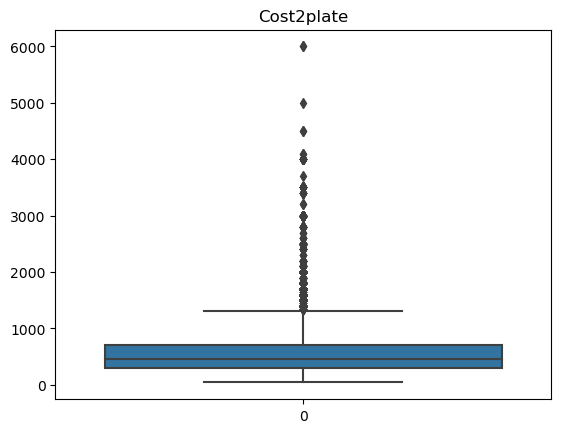

In [57]:
sns.boxplot(data.Cost2plate)
plt.title("Cost2plate")

#### Now I want to check if there are some outlies present in my data

Text(0.5, 1.0, 'Outliers in RATE,VOTES andCOST2PLATE')

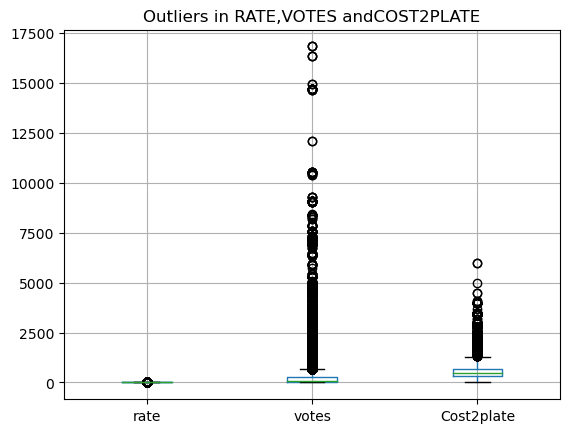

In [58]:
data.boxplot()
plt.title("Outliers in RATE,VOTES andCOST2PLATE")

In [59]:
# In the votes column there are outliers so we need to remove those outliers and for removing outliers we use IQR method
#IQR method is nothing but Q3(75% of data)-Q1(25% of data)
Q1 = df.votes.quantile(0.25)
Q3 = df.votes.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_end = Q1 - 1.5*IQR
higher_end = Q3 + 1.5*IQR
lower_end, higher_end

7.0 198.0
191.0


(-279.5, 484.5)

Here in the output value of Q1 is 7.0, value of Q3 is 198.0 and the value IQR is 191.0

In [60]:
data[(data.votes<lower_end)|(data.votes>higher_end)]      #here we are checking if the value is lower than lower end or higher than higher end 

name online_order book_table  rate  votes  \
0                     Jalsa          Yes        Yes   4.1    775   
1            Spice Elephant          Yes         No   4.1    787   
2           San Churro Cafe          Yes         No   3.8    918   
7                    Onesta          Yes        Yes   4.6   2556   
9                 Smacznego          Yes         No   4.2    504   
...                     ...          ...        ...   ...    ...   
51699    Harry's Bar + Cafe          Yes        Yes   4.1   1218   
51700               BAR BAR           No        Yes   4.1   1003   
51701         The Beer Cafe          Yes        Yes   4.1    673   
51702     Pablo's Gastrobar           No         No   4.0   1094   
51703  Oliver's Pub & Diner          Yes        Yes   3.9    548   

           location            rest_type  \
0      Banashankari        Casual Dining   
1      Banashankari        Casual Dining   
2      Banashankari  Cafe, Casual Dining   
7      Banashankari  Casual Dining, Cafe   
9      Banashankari                 Cafe   
...             ...                  ...   
51699    Whitefield                  Pub   
51700    Whitefield   Bar, Casual Dining   
51701    Whitefield                  Pub   
51702    Whitefield                  Bar   
51703    Whitefield   Pub, Casual Dining   

                                                cuisines  Cost2plate  \
0                         North Indian, Mughlai, Chinese       800.0   
1                            Chinese, North Indian, Thai       800.0   
2                                 Cafe, Mexican, Italian       800.0   
7                                   Pizza, Cafe, Italian       600.0   
9               Cafe, Mexican, Italian, Momos, Beverages       550.0   
...                                                  ...         ...   
51699                           Asian, American, Mexican      1200.0   
51700                 Continental, North Indian, Italian      1500.0   
51701        Finger Food, North Indian, Chinese, Italian      1400.0   
51702              Finger Food, American, Asian, Italian      1450.0   
51703  Finger Food, American, Continental, Burger, Pizza      1500.0   

                Type  
0             Buffet  
1             Buffet  
2             Buffet  
7              Cafes  
9              Cafes  
...              ...  
51699  Pubs and bars  
51700  Pubs and bars  
51701  Pubs and bars  
51702  Pubs and bars  
51703  Pubs and bars  

[6033 rows x 10 columns]

<Axes: >

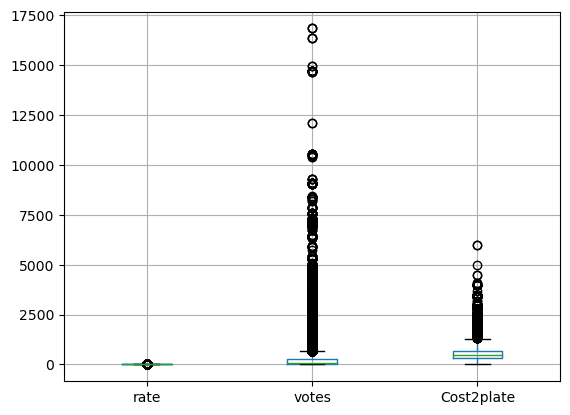

In [61]:
data.boxplot()

In [62]:
#there are extreme outlies in the cost2plate column which we should remove
data[(data.Cost2plate>3010)].shape 

(62, 10)

In [63]:
data=data[(data.Cost2plate<3010)]

<Axes: >

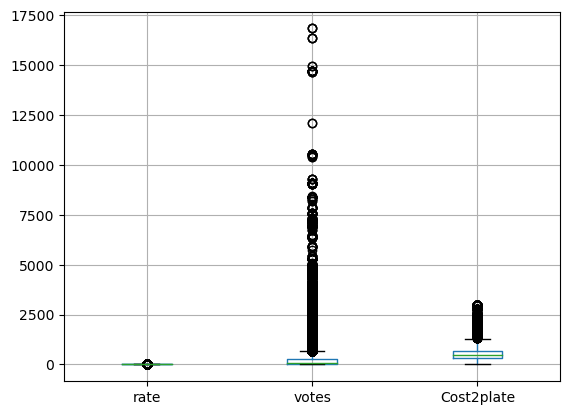

In [70]:
data.boxplot()

In [71]:
# I have checked in the above plot that there are some outliers but that outliers contains 65 records which I shouldn't remove
data[(data.Cost2plate>2800)].shape 

(116, 10)

In [72]:
data["Cost2plate"] = data["Cost2plate"].fillna(data["Cost2plate"].mean())        #filling the null values using mean function

In [73]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

**Now, there are no null values in my data**

In [74]:
data.info()
# all the datatype set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34728 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34728 non-null  object 
 1   online_order  34728 non-null  object 
 2   book_table    34728 non-null  object 
 3   rate          34728 non-null  float64
 4   votes         34728 non-null  int64  
 5   location      34728 non-null  object 
 6   rest_type     34728 non-null  object 
 7   cuisines      34728 non-null  object 
 8   Cost2plate    34728 non-null  float64
 9   Type          34728 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [75]:
data.head(2)      #If we see the output then we will know that all datatypes which needed 
                    #to be changed are now changed and there are no null values 

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1    775  Banashankari   
1  Spice Elephant          Yes         No   4.1    787  Banashankari   

       rest_type                        cuisines  Cost2plate    Type  
0  Casual Dining  North Indian, Mughlai, Chinese       800.0  Buffet  
1  Casual Dining     Chinese, North Indian, Thai       800.0  Buffet

In [76]:
data.shape

(34728, 10)

## Cleaning  and clustering the rest_type column

In [77]:
data['rest_type'].value_counts() #all those records which have less values like 1,2 ,etc. till 1000, 
                                    #will be clustered as others
                                        

Quick Bites                   12265
Casual Dining                  7535
Cafe                           2578
Delivery                       1509
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [78]:
rest_type=data['rest_type'].value_counts()       #I have reassigned data to rest_type variable
rest_type

Quick Bites                   12265
Casual Dining                  7535
Cafe                           2578
Delivery                       1509
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [79]:
rest_type_lessthan1000=rest_type[rest_type<1000]  # filtered the data whose values are lessthan 1000 and have assigned it
rest_type_lessthan1000

Casual Dining, Bar            949
Bakery                        736
Beverage Shop                 488
Bar                           473
Food Court                    424
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 87, dtype: int64

In [80]:
def handle_rest_type(value):                   # here I am using user-defined function to make the cluster
    if(value in rest_type_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value

In [81]:
data['rest_type']=data['rest_type'].apply(handle_rest_type)     

In [82]:
data['rest_type'].value_counts()

Quick Bites           12265
others                 8133
Casual Dining          7535
Cafe                   2578
Delivery               1509
Dessert Parlor         1491
Takeaway, Delivery     1217
Name: rest_type, dtype: int64

In [83]:
data.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

       rest_type                        cuisines  Cost2plate    Type  
0  Casual Dining  North Indian, Mughlai, Chinese       800.0  Buffet  
1  Casual Dining     Chinese, North Indian, Thai       800.0  Buffet  
2         others          Cafe, Mexican, Italian       800.0  Buffet  
3    Quick Bites      South Indian, North Indian       300.0  Buffet  
4  Casual Dining        North Indian, Rajasthani       600.0  Buffet

## Cleaning and clustering the location column

In [84]:
data['location'].value_counts()     #here, I will make cluster the values<300

BTM                     2501
Whitefield              1963
HSR                     1760
Indiranagar             1750
Marathahalli            1667
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [85]:
data['location'].value_counts().unique()

array([2501, 1963, 1760, 1750, 1667, 1605, 1407, 1244, 1221, 1134, 1056,
        938,  687,  624,  598,  595,  591,  587,  584,  573,  556,  554,
        546,  539,  469,  463,  462,  446,  432,  420,  398,  395,  392,
        381,  345,  287,  262,  258,  244,  180,  177,  176,  173,  167,
        164,  157,  147,  134,  129,  128,  119,  117,  114,  106,  103,
        102,  100,   95,   90,   84,   81,   79,   75,   72,   64,   62,
         53,   51,   47,   46,   37,   34,   21,   19,   18,   17,   16,
         14,   13,   10,    6,    5,    4,    2,    1], dtype=int64)

In [86]:
location=data['location'].value_counts()
location
location_less300=location[location<300]

def handle_location(value):
    if(value in location_less300):
        return 'others'
    else:
        return value   

In [87]:
data['location']=data['location'].apply(handle_location) # assigned
data['location'].value_counts()

others                   4845
BTM                      2501
Whitefield               1963
HSR                      1760
Indiranagar              1750
Marathahalli             1667
Koramangala 5th Block    1605
JP Nagar                 1407
Jayanagar                1244
Electronic City          1221
Bellandur                1134
Bannerghatta Road        1056
Sarjapur Road             938
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     595
Kalyan Nagar              591
Koramangala 4th Block     587
New BEL Road              584
Banashankari              573
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 432
Kammanahalli              420
Residency Road            398
Old Airport Road          395
Lavelle Ro

In [88]:
data.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

       rest_type                        cuisines  Cost2plate    Type  
0  Casual Dining  North Indian, Mughlai, Chinese       800.0  Buffet  
1  Casual Dining     Chinese, North Indian, Thai       800.0  Buffet  
2         others          Cafe, Mexican, Italian       800.0  Buffet  
3    Quick Bites      South Indian, North Indian       300.0  Buffet  
4  Casual Dining        North Indian, Rajasthani       600.0  Buffet

## Cleaning and clustering the cuisines column

In [89]:
data['cuisines'].value_counts()                 #cluster just the values between 1 to 100 

North Indian                                   1914
North Indian, Chinese                          1577
South Indian                                   1171
Bakery, Desserts                                593
Biryani                                         560
                                               ... 
Burger, Chinese, Fast Food, Pizza, Sandwich       1
Steak, Beverages                                  1
Salad, Juices                                     1
Pizza, Italian, Chinese, Rolls, Biryani           1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2706, dtype: int64

In [90]:
data['cuisines'].value_counts().unique()

array([1914, 1577, 1171,  593,  560,  485,  475,  447,  387,  332,  304,
        260,  253,  238,  226,  212,  207,  200,  190,  186,  179,  174,
        164,  162,  159,  154,  152,  147,  145,  142,  139,  138,  135,
        130,  129,  128,  126,  125,  123,  120,  119,  115,  114,  110,
        105,  104,  102,   99,   97,   96,   95,   82,   81,   76,   75,
         72,   71,   68,   67,   65,   64,   62,   61,   60,   58,   57,
         56,   55,   54,   53,   52,   51,   50,   49,   48,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
      dtype=int64)

In [91]:
cuisines=data['cuisines'].value_counts()
cuisines
cuisines_less150=cuisines[cuisines<150]

def handle_cuisines(value):
    if(value in cuisines_less150):
        return 'others'
    else:
        return value

In [92]:
data['cuisines']=data['cuisines'].apply(handle_cuisines) #assigned
data['cuisines'].value_counts()

others                                 22515
North Indian                            1914
North Indian, Chinese                   1577
South Indian                            1171
Bakery, Desserts                         593
Biryani                                  560
Fast Food                                485
South Indian, North Indian, Chinese      475
Desserts                                 447
Cafe                                     447
Bakery                                   387
Chinese                                  332
Ice Cream, Desserts                      304
Mithai, Street Food                      260
Chinese, North Indian                    253
North Indian, Chinese, Biryani           238
North Indian, South Indian               226
Desserts, Ice Cream                      226
North Indian, South Indian, Chinese      212
South Indian, North Indian               207
Finger Food                              200
North Indian, Biryani                    190
Desserts, 

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34728 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34728 non-null  object 
 1   online_order  34728 non-null  object 
 2   book_table    34728 non-null  object 
 3   rate          34728 non-null  float64
 4   votes         34728 non-null  int64  
 5   location      34728 non-null  object 
 6   rest_type     34728 non-null  object 
 7   cuisines      34728 non-null  object 
 8   Cost2plate    34728 non-null  float64
 9   Type          34728 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [94]:
data['Type'].value_counts()

Delivery              16078
Dine-out              12801
Desserts               2459
Cafes                  1238
Drinks & nightlife      898
Buffet                  661
Pubs and bars           593
Name: Type, dtype: int64

## Data is Cleaned now, Lets go for Visualization

In [95]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plate', 'Type'],
      dtype='object')

### Histograms

Histograms are one of the most common graphs used to display numeric data.

In [96]:
data.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

       rest_type                    cuisines  Cost2plate    Type  
0  Casual Dining                      others       800.0  Buffet  
1  Casual Dining                      others       800.0  Buffet  
2         others                      others       800.0  Buffet  
3    Quick Bites  South Indian, North Indian       300.0  Buffet  
4  Casual Dining                      others       600.0  Buffet

In [97]:
#Here we are resetting the index
data.reset_index(drop=True)           

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
34723  Best Brews - Four Points by Sheraton Bengaluru...           No   
34724                           Vinod Bar And Restaurant           No   
34725  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
34726  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
34727                       The Nest - The Den Bengaluru           No   

      book_table      rate  votes      location      rest_type  \
0            Yes  4.100000    775  Banashankari  Casual Dining   
1             No  4.100000    787  Banashankari  Casual Dining   
2             No  3.800000    918  Banashankari         others   
3             No  3.700000     88  Banashankari    Quick Bites   
4             No  3.800000    166  Basavanagudi  Casual Dining   
...          ...       ...    ...           ...            ...   
34723         No  3.600000     27    Whitefield         others   
34724         No  3.730491      0    Whitefield         others   
34725         No  3.730491      0    Whitefield         others   
34726        Yes  4.300000    236        others         others   
34727         No  3.400000     13        others         others   

                         cuisines  Cost2plate           Type  
0                          others       800.0         Buffet  
1                          others       800.0         Buffet  
2                          others       800.0         Buffet  
3      South Indian, North Indian       300.0         Buffet  
4                          others       600.0         Buffet  
...                           ...         ...            ...  
34723                      others      1500.0  Pubs and bars  
34724                 Finger Food       600.0  Pubs and bars  
34725                 Finger Food      2000.0  Pubs and bars  
34726                 Finger Food      2500.0  Pubs and bars  
34727                      others      1500.0  Pubs and bars  

[34728 rows x 10 columns]

In [100]:
data.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.73049074, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

### Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road'),

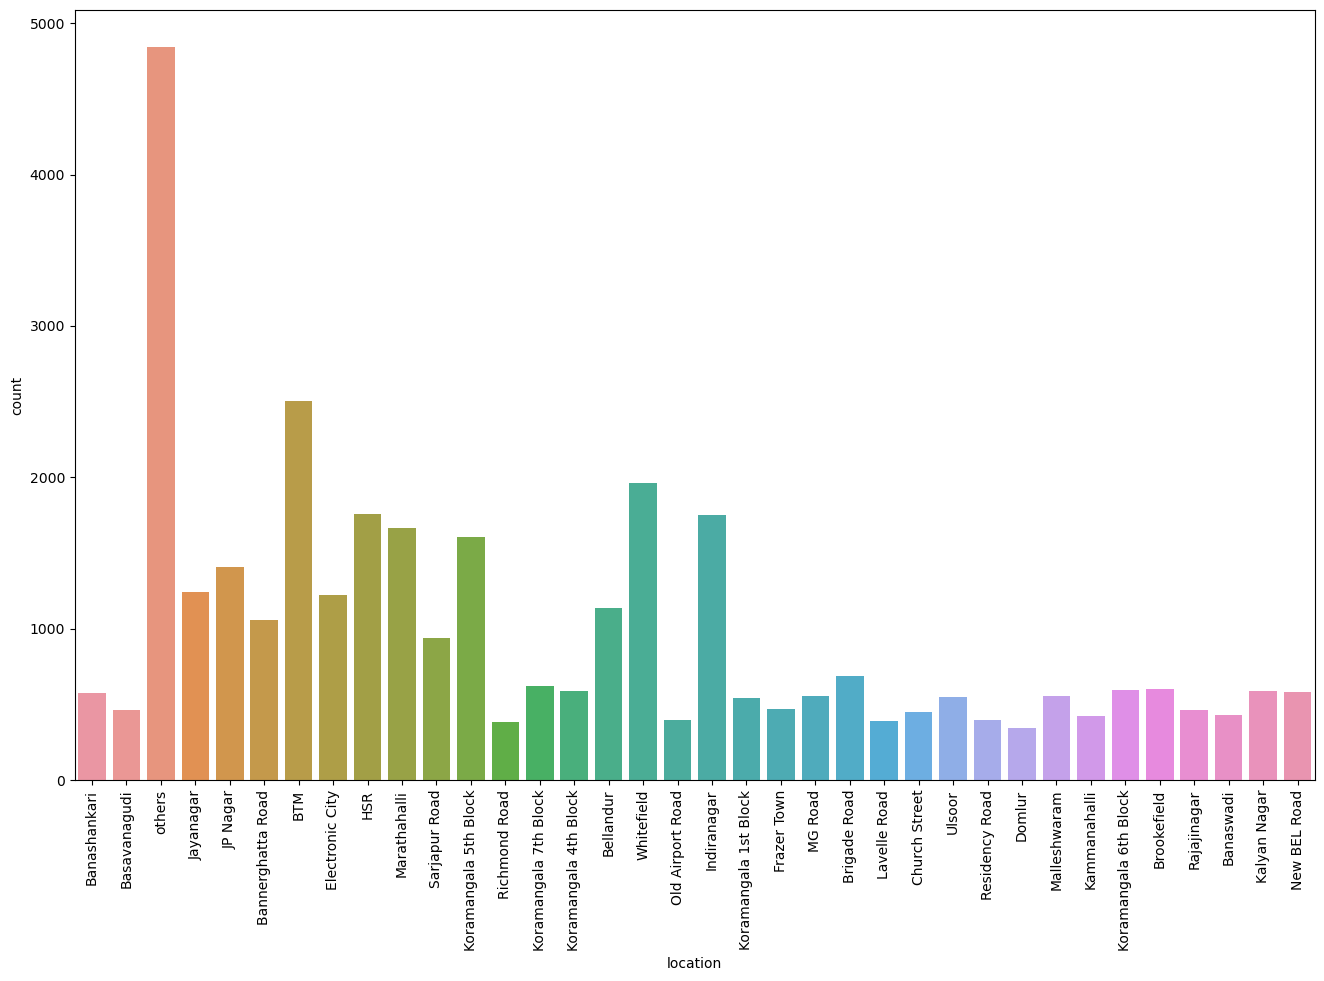

In [101]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='location')
plt.xticks(rotation=90)

**Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.**

### Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

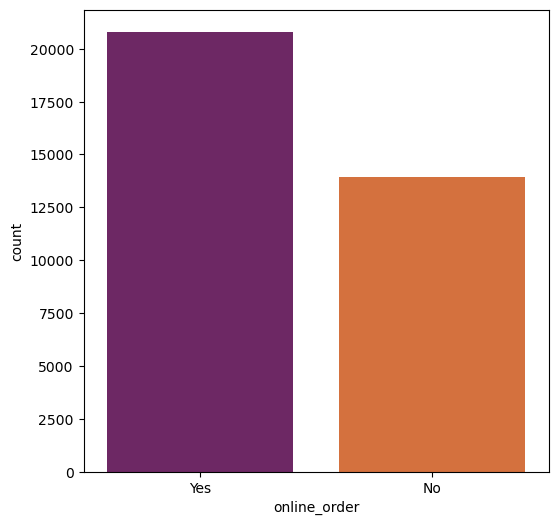

In [96]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='online_order', palette = 'inferno')

**The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.**

### Visualizing book_table

<Axes: xlabel='book_table', ylabel='count'>

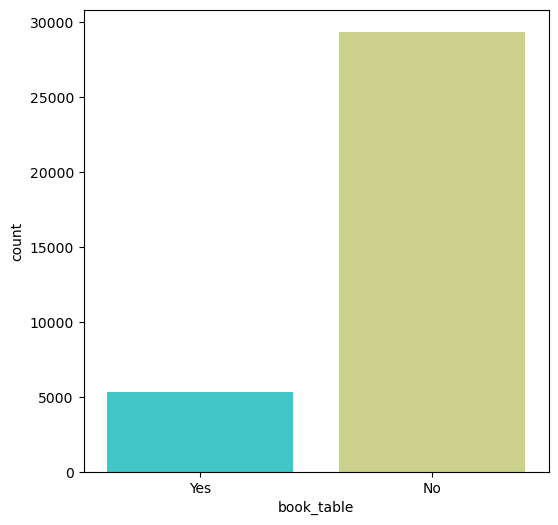

In [97]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='book_table', palette = 'rainbow')

**The analysis reveals a comparatively lower count of "book_table" instances with the choice "No."**

### Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

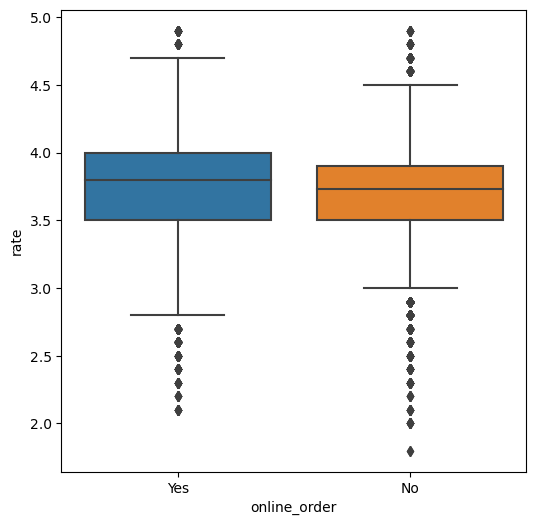

In [102]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate',data = data,orient='v')

### Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

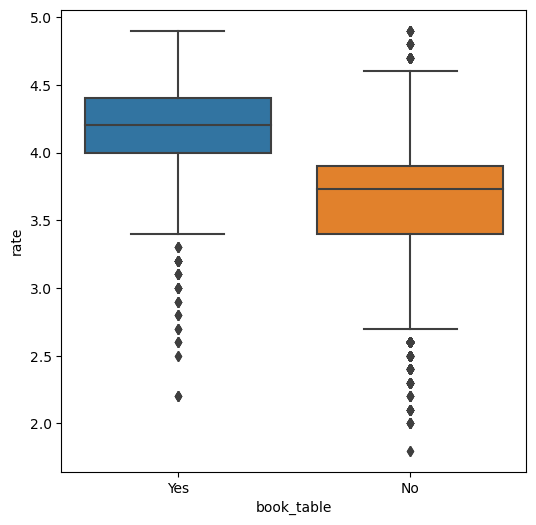

In [103]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data)

### Visualizing Online Order Facility, Location Wise 

In [104]:
df1 = data.groupby(['location','online_order'])['name'].count() # I am going to group my data location wise and  
                                                                              #create new csv format.
    
#to_csv() function converts DataFrame into CSV data. We can pass a file object to write the CSV data into a file.
                                     #Otherwise, the CSV data is returned in the string format.       
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     802  1699
Banashankari            260   313
Banaswadi               213   219
Bannerghatta Road       403   653
Basavanagudi            182   281
Bellandur               443   691
Brigade Road            293   394
Brookefield             206   392
Church Street           182   264
Domlur                  187   158
Electronic City         661   560
Frazer Town             206   263
HSR                     441  1319
Indiranagar             648  1102
JP Nagar                563   844
Jayanagar               382   862
Kalyan Nagar            241   350
Kammanahalli            176   244
Koramangala 1st Block   148   391
Koramangala 4th Block   279   308
Koramangala 5th Block   580  1025
Koramangala 6th Block   211   384
Koramangala 7th Block   190   434
Lavelle Road            233   159
MG Road                 297   257
Malleshwaram            224   332
Marathahalli            642  1025
New BEL Road            250   334
Old Airport Road        195   200
Rajajinagar             214   248
Residency Road          251   147
Richmond Road           241   140
Sarjapur Road           283   655
Ulsoor                  201   345
Whitefield              885  1078
others                 2102  2743

<Axes: xlabel='location'>

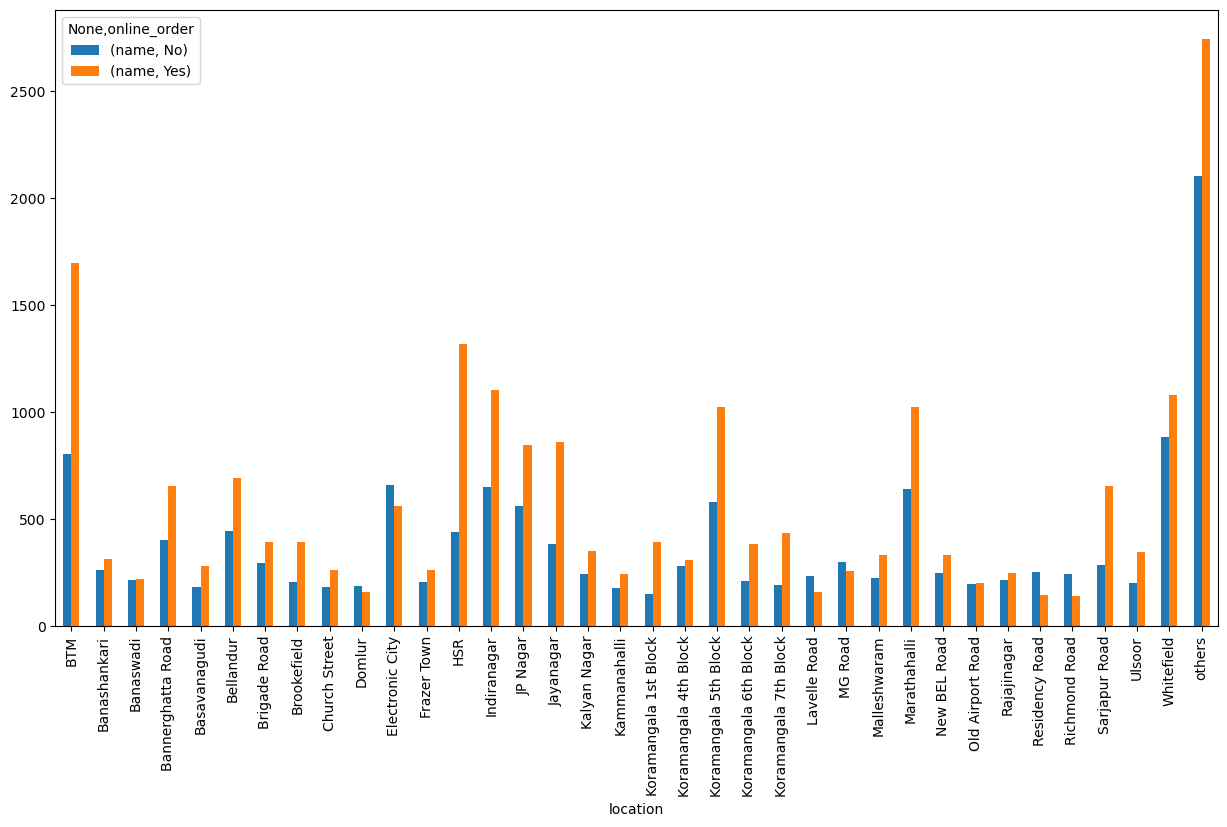

In [105]:
df1.plot(kind = 'bar', figsize = (15,8))

**Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.**

### Visualizing Book Table Facility, Location Wise

In [106]:
df2 = data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2375  126
Banashankari            530   43
Banaswadi               426    6
Bannerghatta Road       977   79
Basavanagudi            451   12
Bellandur              1038   96
Brigade Road            541  146
Brookefield             525   73
Church Street           279  167
Domlur                  300   45
Electronic City        1125   96
Frazer Town             461    8
HSR                    1573  187
Indiranagar            1313  437
JP Nagar               1155  252
Jayanagar              1017  227
Kalyan Nagar            473  118
Kammanahalli            386   34
Koramangala 1st Block   497   42
Koramangala 4th Block   340  247
Koramangala 5th Block  1004  601
Koramangala 6th Block   514   81
Koramangala 7th Block   494  130
Lavelle Road            195  197
MG Road                 286  268
Malleshwaram            475   81
Marathahalli           1510  157
New BEL Road            529   55
Old Airport Road        347   48
Rajajinagar             422   40
Residency Road          304   94
Richmond Road           308   73
Sarjapur Road           791  147
Ulsoor                  433  113
Whitefield             1711  252
others                 4279  566

<Axes: xlabel='location'>

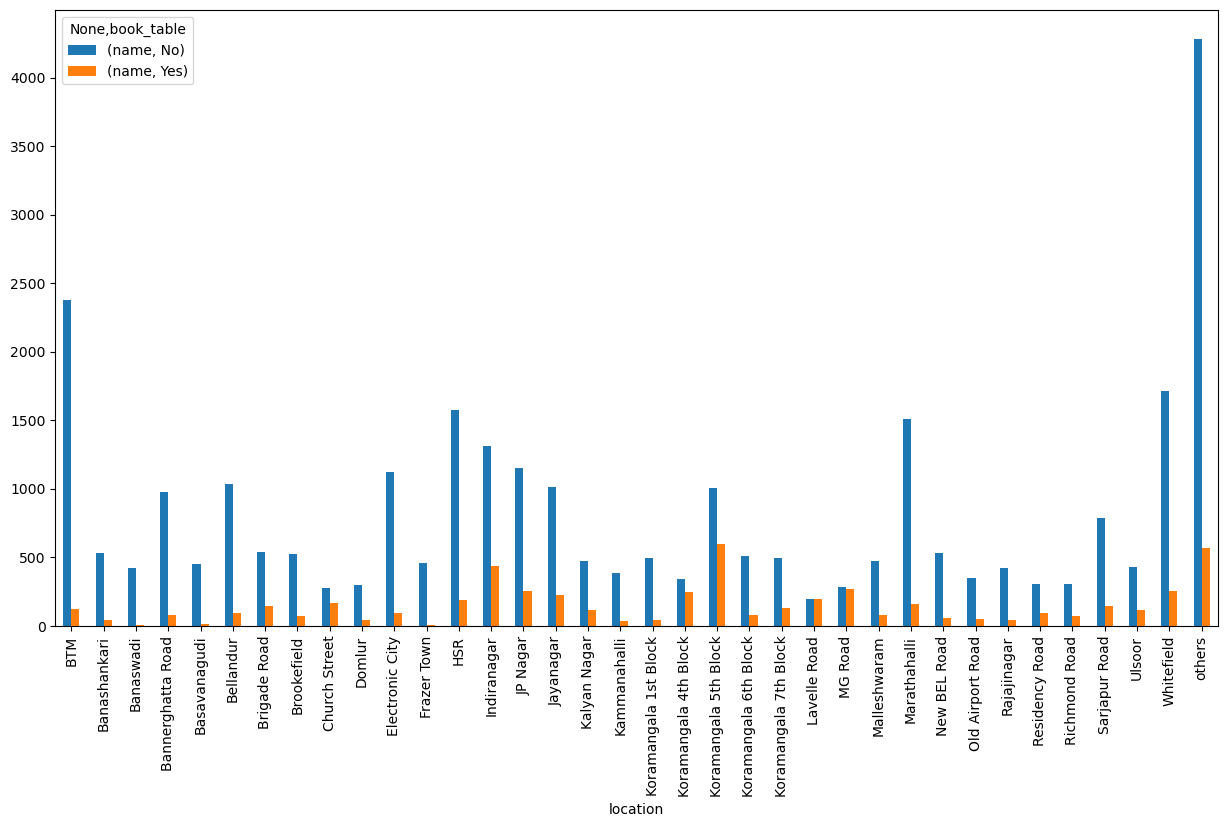

In [103]:
df2.plot(kind = 'bar', figsize = (15,8))

**Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.**

### Visualizing Types of Restaurents vs Rate

<Axes: xlabel='Type', ylabel='rate'>

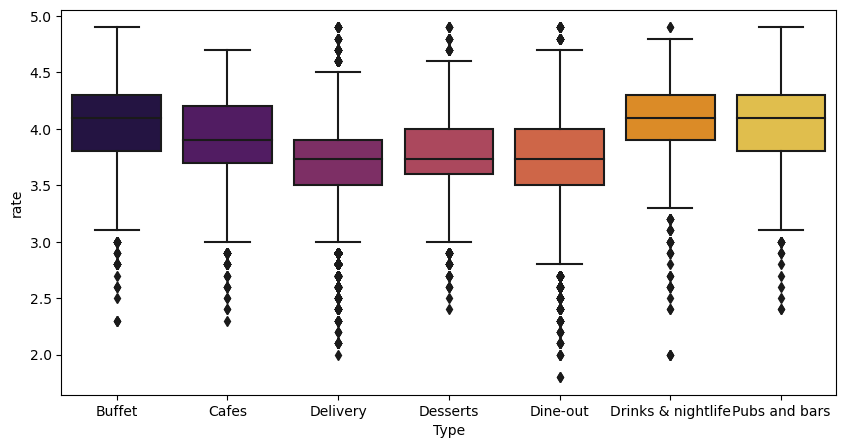

In [109]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Type', y = 'rate', data = data, palette = 'inferno',orient='v')

**An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

### Grouping Types of Restaurents, location wise 

In [110]:
df3 = data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       15    46     1429      110      872   
Banashankari               5    24      244       46      247   
Banaswadi                  0    13      159       19      236   
Bannerghatta Road          8    27      512       92      406   
Basavanagudi               4     8      195       45      208   
Bellandur                 28    34      519       72      448   
Brigade Road              13    24      249       55      273   
Brookefield                6    17      299       42      230   
Church Street             19    44      138       21      172   
Domlur                    11    12      168       24      108   
Electronic City           22    24      552       71      510   
Frazer Town                1    10      267       46      141   
HSR                       14    42     1080      110      485   
Indiranagar               38    97      833      136      515   
JP Nagar                  25    41      632      104      558   
Jayanagar                 19    50      560      118      485   
Kalyan Nagar               9    24      190       45      308   
Kammanahalli               2    14      161       18      222   
Koramangala 1st Block      3    14      319       32      156   
Koramangala 4th Block     13    43      249       38      163   
Koramangala 5th Block     51   118      626      135      542   
Koramangala 6th Block     12    30      281       48      181   
Koramangala 7th Block     19    30      247       69      215   
Lavelle Road              24    22       87       28      154   
MG Road                   32    55      138       37      221   
Malleshwaram              11    24      197       63      231   
Marathahalli              34    30      885       94      602   
New BEL Road               4    29      278       34      223   
Old Airport Road          10     5      175       35      149   
Rajajinagar                9     4      196       44      196   
Residency Road            10    19      106       38      171   
Richmond Road             41    13      110       37      164   
Sarjapur Road             23    19      475       78      302   
Ulsoor                    12    32      217       38      216   
Whitefield                28    50      946      129      731   
others                    86   150     2359      308     1760   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   15            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      9             2  
Basavanagudi                           3             0  
Bellandur                             17            16  
Brigade Road                          51            22  
Brookefield                            4             0  
Church Street                         31            21  
Domlur                                11            11  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            15  
Indiranagar                           65            66  
JP Nagar                              40             7  
Jayanagar                             12             0  
Kalyan Nagar                          15             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  5            10  
Koramangala 4th Block                 50            31  
Koramangala 5th Block                 75            58  
Koramangala 6th Block                 25            18  
Koramangala 7th Block                 22            22  
Lavell

<Axes: xlabel='location'>

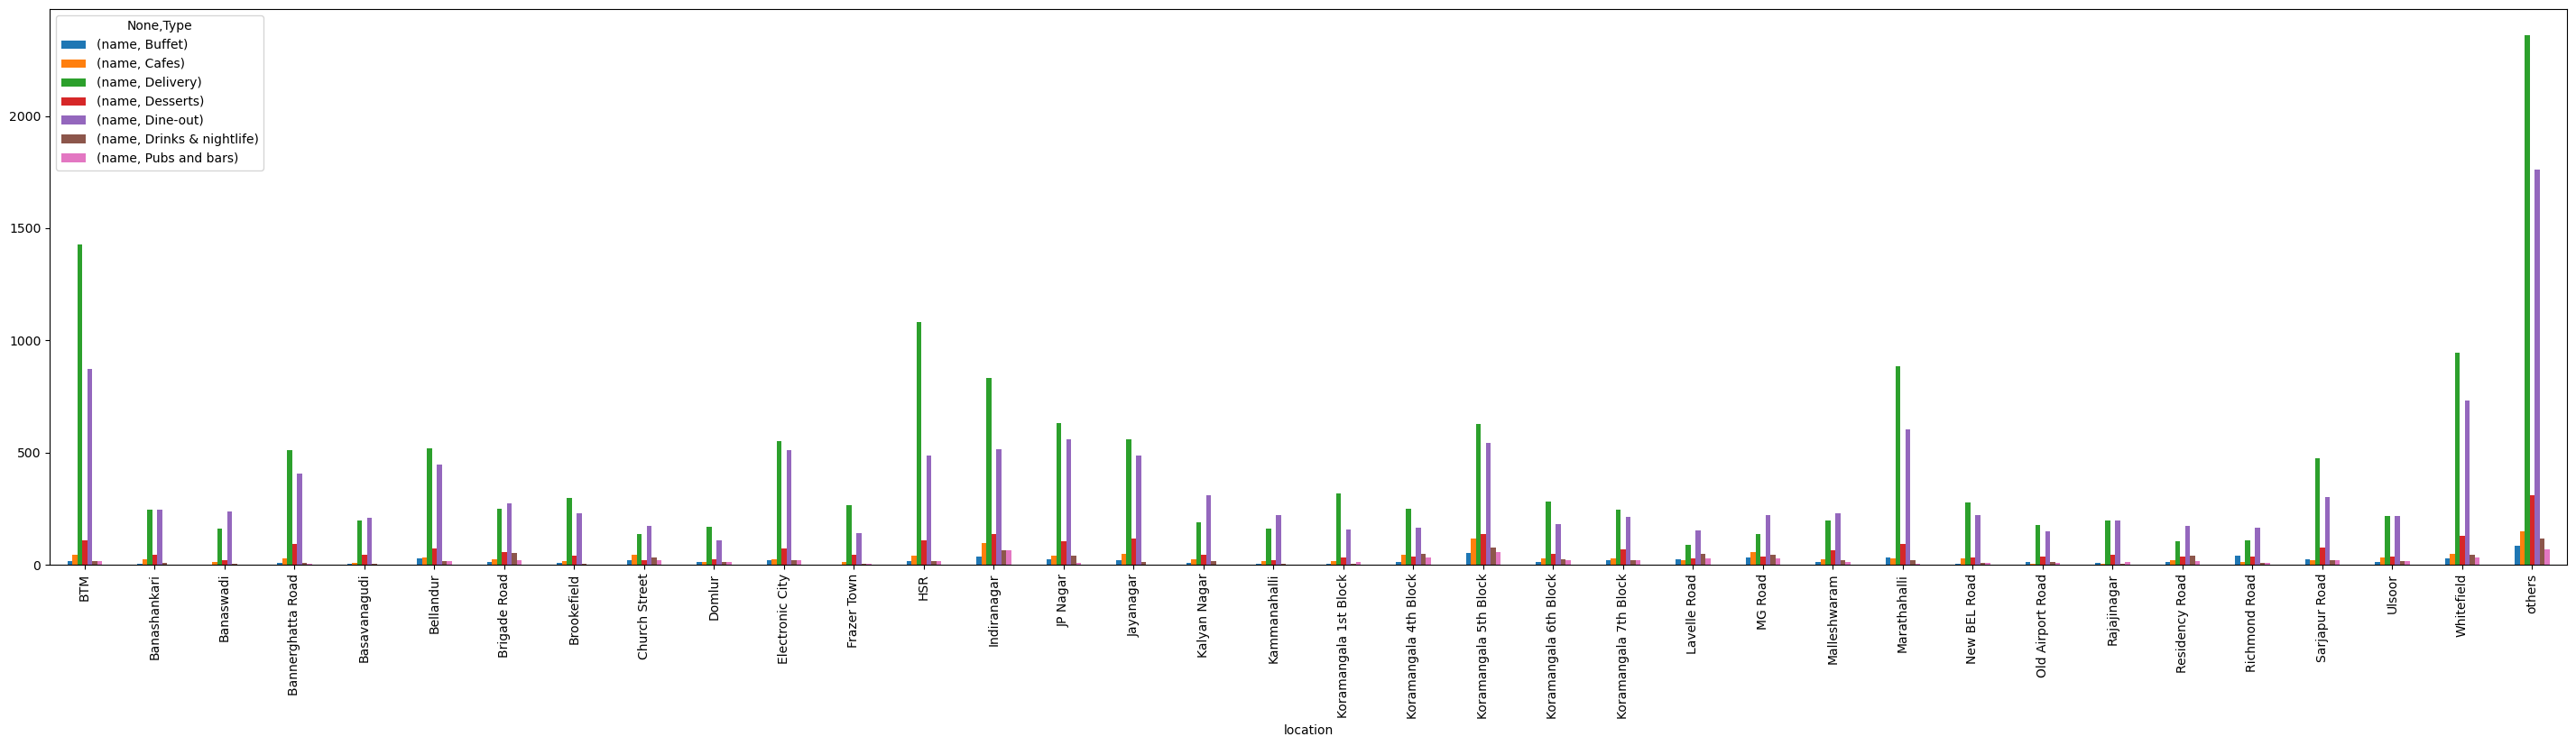

In [111]:
df3.plot(kind = 'bar', figsize = (36,8))

<Axes: xlabel='location'>

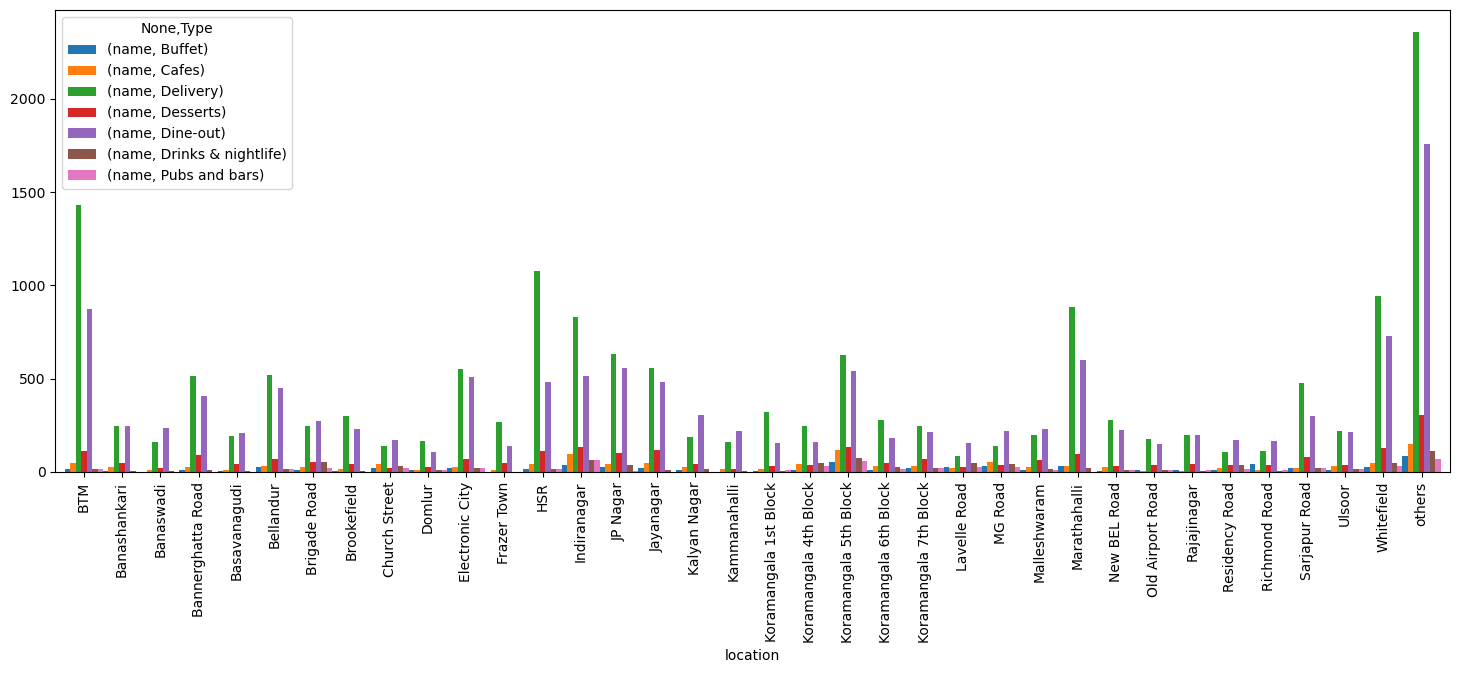

In [114]:
df3.plot(kind='bar', figsize=(18, 6), width=1.0)

**Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.**

### No. of Votes, Location Wise 

In [115]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head(10)

votes
location                      
Koramangala 5th Block  2219506
Indiranagar            1196007
Koramangala 4th Block   685156
BTM                     619376
Church Street           594979
JP Nagar                586593
Lavelle Road            506186
HSR                     499720
Koramangala 7th Block   495324
Jayanagar               488080

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'St. M

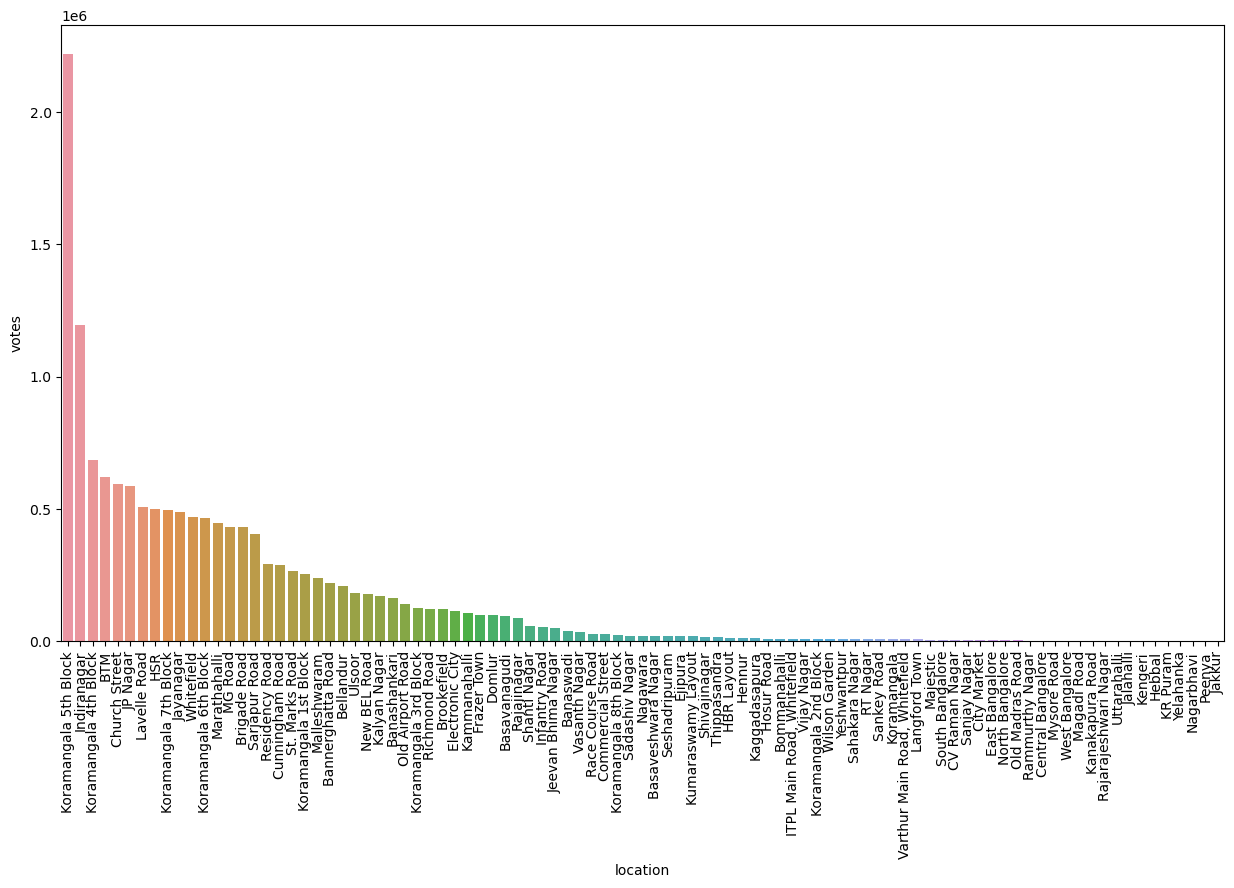

In [116]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x = df5.index, y='votes')
plt.xticks(rotation = 90)

**"Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.**

### Visualizing Top Cuisines

In [109]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

votes
cuisines                                            
North Indian                                  558654
Pizza, Cafe, Italian                          347520
Cafe, American, Burger, Steak                 301059
North Indian, Chinese                         259864
North Indian, Mughlai, South Indian, Chinese  227930

In [110]:
df7 = df7.iloc[1:, :]
df7.head()

votes
cuisines                                            
Pizza, Cafe, Italian                          347520
Cafe, American, Burger, Steak                 301059
North Indian, Chinese                         259864
North Indian, Mughlai, South Indian, Chinese  227930
South Indian                                  161991

(array([   0,    1,    2, ..., 2719, 2720, 2721]),
 [Text(0, 0, 'Pizza, Cafe, Italian'),
  Text(1, 0, 'Cafe, American, Burger, Steak'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'North Indian, Mughlai, South Indian, Chinese'),
  Text(4, 0, 'South Indian'),
  Text(5, 0, 'North Indian, Thai, Japanese, Continental, Cafe'),
  Text(6, 0, 'North Indian, European, Mediterranean'),
  Text(7, 0, 'North Indian, Continental, Chinese'),
  Text(8, 0, 'North Indian, European, Mediterranean, BBQ, Kebab'),
  Text(9, 0, 'North Indian, Mughlai'),
  Text(10, 0, 'Cafe, Italian, Burger, American, Steak'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'Cafe'),
  Text(13, 0, 'Continental, North Indian, Italian, South Indian, Finger Food'),
  Text(14, 0, 'American, North Indian, Chinese, Finger Food, Momos'),
  Text(15, 0, 'European, Continental'),
  Text(16, 0, 'North Indian, Chinese, BBQ'),
  Text(17, 0, 'Continental, Asian, North Indian'),
  Text(18, 0, 'Mediterranean, Pizza, Continental, Seafood, Sala

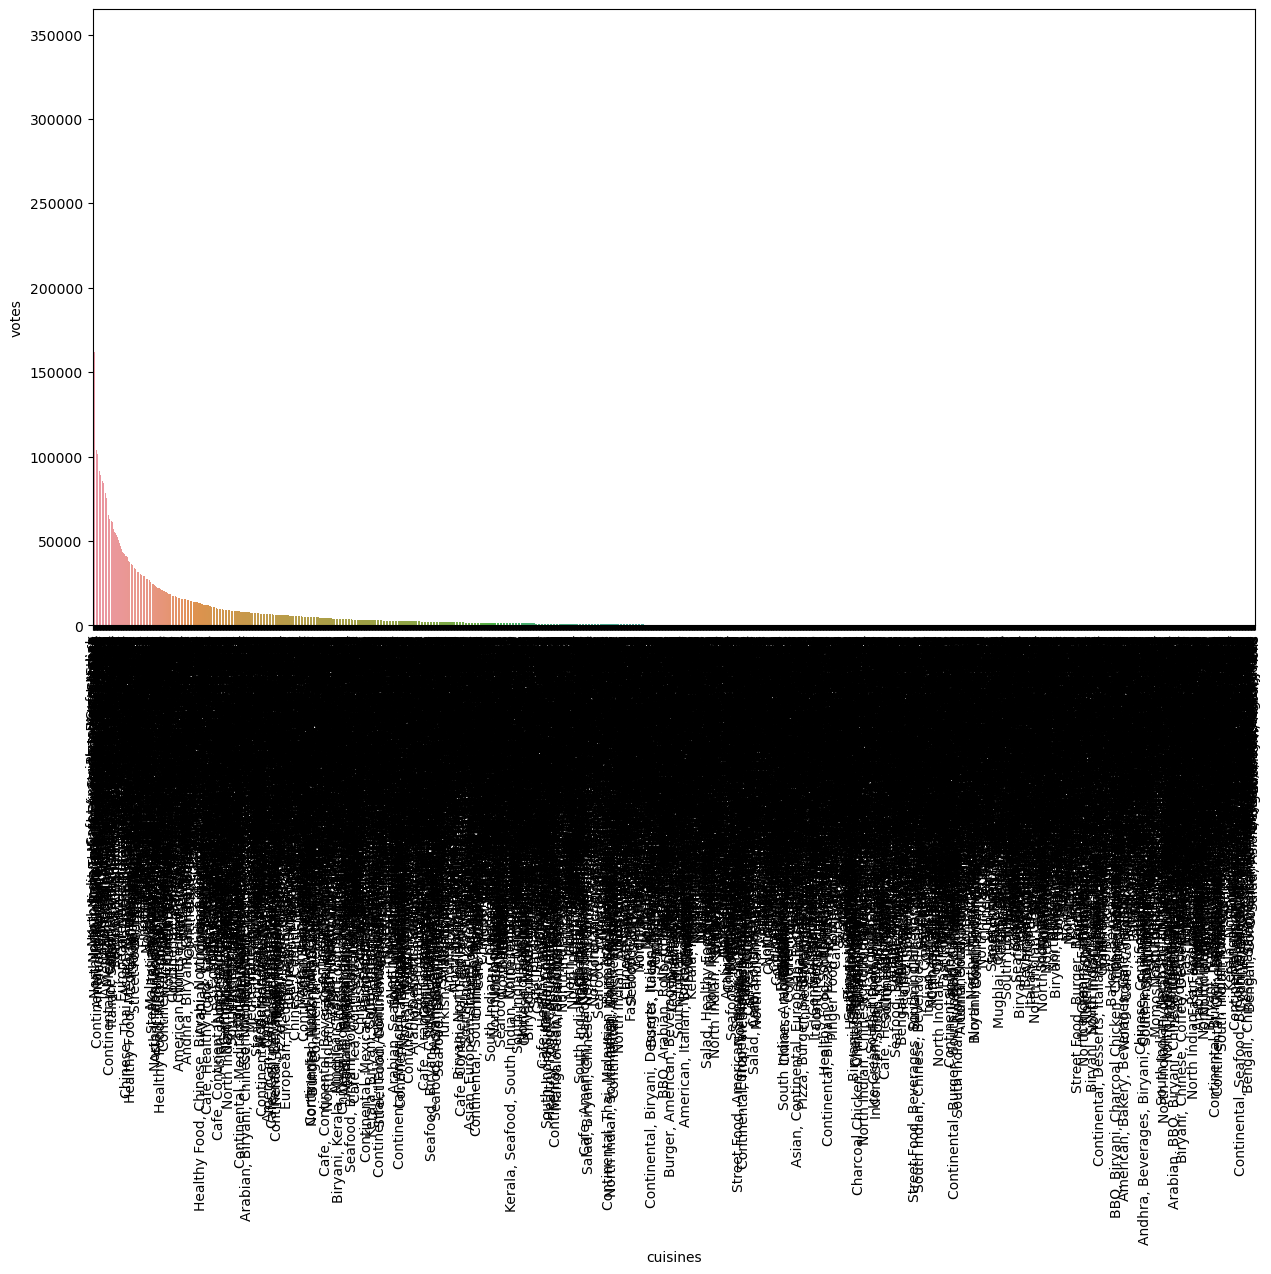

In [111]:
plt.figure(figsize = (15,8))
sns.barplot(data=df7, x = df7.index, y='votes')
plt.xticks(rotation = 90)

### After all the visualization we have done above, we can come to the conclusions below:


#### 1) Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.

#### 2) The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.

#### 3) Conversely, the analysis reveals a comparatively lower count of "Table_order" instances with the choice "No."

#### 4) Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.

#### 5) Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.

#### 6) **An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

#### 7) Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.

#### 8) Finally, "Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.

## Visualization has been completed, now we will go to the MACHINE LEARNING part

In [117]:
data.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

       rest_type                    cuisines  Cost2plate    Type  
0  Casual Dining                      others       800.0  Buffet  
1  Casual Dining                      others       800.0  Buffet  
2         others                      others       800.0  Buffet  
3    Quick Bites  South Indian, North Indian       300.0  Buffet  
4  Casual Dining                      others       600.0  Buffet

In [118]:
data['rate'].value_counts()

3.730491    5039
3.900000    2859
3.700000    2585
3.800000    2571
4.000000    2384
4.100000    2252
3.600000    2185
3.500000    1799
4.200000    1710
3.400000    1628
3.300000    1517
4.300000    1402
3.200000    1284
3.100000    1046
4.400000     997
3.000000     728
4.500000     601
2.900000     562
2.800000     423
4.600000     275
2.700000     216
2.600000     179
4.700000     166
2.500000      70
4.800000      60
2.400000      58
4.900000      52
2.300000      37
2.100000      19
2.200000      12
2.000000      10
1.800000       2
Name: rate, dtype: int64

In [119]:
rate=data['rate']
rate

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.730491
51714    3.730491
51715    4.300000
51716    3.400000
Name: rate, Length: 34728, dtype: float64

In [120]:
rate

# Define bin edges (boundaries)

bin_edges = [0,2.500000 ,3.500000 ,4.500000,5]

# Define bin labels for each interval
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Use the cut() function to create bins
binned_data = pd.cut(rate, bins=bin_edges, labels=bin_labels)

In [121]:
# Create a DataFrame with original data and binned data
DF= pd.DataFrame({'Rate': binned_data})

print(DF)


         Rate
0        High
1        High
2        High
3        High
4        High
...       ...
51712    High
51713    High
51714    High
51715    High
51716  Medium

[34728 rows x 1 columns]


In [122]:
#I will now create new column as Rating and insert my DF data into that column.
data['Rating']=DF

In [123]:
#I want to remove the rate column because that column is not needed now
data.drop('rate',axis=1,inplace=True)

In [124]:
data.head()

name online_order book_table  votes      location  \
0                  Jalsa          Yes        Yes    775  Banashankari   
1         Spice Elephant          Yes         No    787  Banashankari   
2        San Churro Cafe          Yes         No    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No     88  Banashankari   
4          Grand Village           No         No    166  Basavanagudi   

       rest_type                    cuisines  Cost2plate    Type Rating  
0  Casual Dining                      others       800.0  Buffet   High  
1  Casual Dining                      others       800.0  Buffet   High  
2         others                      others       800.0  Buffet   High  
3    Quick Bites  South Indian, North Indian       300.0  Buffet   High  
4  Casual Dining                      others       600.0  Buffet   High

In [125]:
data.reset_index(inplace=True)

In [126]:
data.drop('index',axis=1,inplace=True)

In [127]:
data

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
34723  Best Brews - Four Points by Sheraton Bengaluru...           No   
34724                           Vinod Bar And Restaurant           No   
34725  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
34726  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
34727                       The Nest - The Den Bengaluru           No   

      book_table  votes      location      rest_type  \
0            Yes    775  Banashankari  Casual Dining   
1             No    787  Banashankari  Casual Dining   
2             No    918  Banashankari         others   
3             No     88  Banashankari    Quick Bites   
4             No    166  Basavanagudi  Casual Dining   
...          ...    ...           ...            ...   
34723         No     27    Whitefield         others   
34724         No      0    Whitefield         others   
34725         No      0    Whitefield         others   
34726        Yes    236        others         others   
34727         No     13        others         others   

                         cuisines  Cost2plate           Type  Rating  
0                          others       800.0         Buffet    High  
1                          others       800.0         Buffet    High  
2                          others       800.0         Buffet    High  
3      South Indian, North Indian       300.0         Buffet    High  
4                          others       600.0         Buffet    High  
...                           ...         ...            ...     ...  
34723                      others      1500.0  Pubs and bars    High  
34724                 Finger Food       600.0  Pubs and bars    High  
34725                 Finger Food      2000.0  Pubs and bars    High  
34726                 Finger Food      2500.0  Pubs and bars    High  
34727                      others      1500.0  Pubs and bars  Medium  

[34728 rows x 10 columns]

### Label encoding

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
LE= LabelEncoder()
data['location']=LE.fit_transform(data['location'])

In [130]:
data['rest_type']=LE.fit_transform(data['rest_type'])

In [131]:
data['cuisines']=LE.fit_transform(data['cuisines'])
data['Type']=LE.fit_transform(data['Type'])

In [132]:
data

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
34723  Best Brews - Four Points by Sheraton Bengaluru...           No   
34724                           Vinod Bar And Restaurant           No   
34725  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
34726  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
34727                       The Nest - The Den Bengaluru           No   

      book_table  votes  location  rest_type  cuisines  Cost2plate  Type  \
0            Yes    775         1          1        30       800.0     0   
1             No    787         1          1        30       800.0     0   
2             No    918         1          6        30       800.0     0   
3             No     88         1          4        27       300.0     0   
4             No    166         4          1        30       600.0     0   
...          ...    ...       ...        ...       ...         ...   ...   
34723         No     27        34          6        30      1500.0     6   
34724         No      0        34          6        16       600.0     6   
34725         No      0        34          6        16      2000.0     6   
34726        Yes    236        35          6        16      2500.0     6   
34727         No     13        35          6        30      1500.0     6   

       Rating  
0        High  
1        High  
2        High  
3        High  
4        High  
...       ...  
34723    High  
34724    High  
34725    High  
34726    High  
34727  Medium  

[34728 rows x 10 columns]

In [133]:
#here I am checking number of unique values
print('online_order',data.online_order.nunique())
print('book_table',data.book_table.nunique()) 
print('Rating',data.Rating.nunique())

online_order 2
book_table 2
Rating 4


In [134]:
#here we are checking the unique values
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())
print('Rating---------->','\n',data.Rating.unique())

rest_type----------> ['Yes' 'No']
type----------> 
 ['Yes' 'No']
Rating----------> 
 ['High', 'Very High', 'Medium', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

In [135]:
data.replace({'Low':0,'Medium':1,'High':2,'Very High':3},inplace=True)   #here we are replacing the categorical data bto numeric values

In [136]:
data.replace({'Yes':0,'No':1},inplace=True)                                #here we are replacing the categorical data bto numeric values

In [137]:
data.head()


name  online_order  book_table  votes  location  \
0                  Jalsa             0           0    775         1   
1         Spice Elephant             0           1    787         1   
2        San Churro Cafe             0           1    918         1   
3  Addhuri Udupi Bhojana             1           1     88         1   
4          Grand Village             1           1    166         4   

   rest_type  cuisines  Cost2plate  Type Rating  
0          1        30       800.0     0      2  
1          1        30       800.0     0      2  
2          6        30       800.0     0      2  
3          4        27       300.0     0      2  
4          1        30       600.0     0      2

In [138]:
print('Rating---------->','\n',data.Rating.unique())
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

Rating----------> 
 [2, 3, 1, 0]
Categories (4, int64): [0 < 1 < 2 < 3]
rest_type----------> [0 1]
type----------> 
 [0 1]


In [139]:
data.drop(['name'],axis=1,inplace=True) #axis=1 is drop column axis=0 drop row
data.head()

online_order  book_table  votes  location  rest_type  cuisines  Cost2plate  \
0             0           0    775         1          1        30       800.0   
1             0           1    787         1          1        30       800.0   
2             0           1    918         1          6        30       800.0   
3             1           1     88         1          4        27       300.0   
4             1           1    166         4          1        30       600.0   

   Type Rating  
0     0      2  
1     0      2  
2     0      2  
3     0      2  
4     0      2

In [140]:
data.describe()

online_order    book_table         votes      location     rest_type  \
count  34728.000000  34728.000000  34728.000000  34728.000000  34728.000000   
mean       0.400685      0.846118    363.219016     18.727281      3.425737   
std        0.490044      0.360840    942.879028     11.678786      1.999845   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000     11.000000     10.000000      1.000000   
50%        0.000000      1.000000     58.000000     18.000000      4.000000   
75%        1.000000      1.000000    270.000000     30.000000      5.000000   
max        1.000000      1.000000  16832.000000     35.000000      6.000000   

           cuisines    Cost2plate          Type  
count  34728.000000  34728.000000  34728.000000  
mean      25.059692    587.837969      2.880183  
std        8.286949    441.765408      1.178249  
min        0.000000     40.000000      0.000000  
25%       21.000000    300.000000      2.000000  
50%       30.000000    450.000000      2.000000  
75%       30.000000    700.000000      4.000000  
max       30.000000   3000.000000      6.000000

## Now I will be backuping the data 

In [141]:
data_backup = data.copy(deep=True)

## Spliting the dataframe into x & y 

In [142]:
# Separate object for target feature 
y= data['Rating']

# Separate object for Predictors 
X = data.drop('Rating',axis=1)

In [143]:
X.head(3)

online_order  book_table  votes  location  rest_type  cuisines  Cost2plate  \
0             0           0    775         1          1        30       800.0   
1             0           1    787         1          1        30       800.0   
2             0           1    918         1          6        30       800.0   

   Type  
0     0  
1     0  
2     0

In [144]:
y.head(2)

0    2
1    2
Name: Rating, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [145]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (34728, 8), Dependent Features Shape = (34728,)


## Splitting the data into Training data and Test data 

In [146]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
    #here test size is 80% of data which will be used for training and 20% data will be used for testing
    #Random state ensures that the splits that you generate are reproducible.
    #this ensures that the random numbers are generated in the same order.

In [147]:
print(X.shape, X_train.shape,X_test.shape)

(34728, 8) (27782, 8) (6946, 8)


In [148]:
print(y.shape,y_train.shape,y_test.shape)

(34728,) (27782,) (6946,)


In [149]:
X.describe()

online_order    book_table         votes      location     rest_type  \
count  34728.000000  34728.000000  34728.000000  34728.000000  34728.000000   
mean       0.400685      0.846118    363.219016     18.727281      3.425737   
std        0.490044      0.360840    942.879028     11.678786      1.999845   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000     11.000000     10.000000      1.000000   
50%        0.000000      1.000000     58.000000     18.000000      4.000000   
75%        1.000000      1.000000    270.000000     30.000000      5.000000   
max        1.000000      1.000000  16832.000000     35.000000      6.000000   

           cuisines    Cost2plate          Type  
count  34728.000000  34728.000000  34728.000000  
mean      25.059692    587.837969      2.880183  
std        8.286949    441.765408      1.178249  
min        0.000000     40.000000      0.000000  
25%       21.000000    300.000000      2.000000  
50%       30.000000    450.000000      2.000000  
75%       30.000000    700.000000      4.000000  
max       30.000000   3000.000000      6.000000

**It is used to scale and standardize the features of a dataset before feeding it into a machine learning algorithm. The primary purpose of the StandardScaler is to make the features have a mean of 0 and a standard deviation of 1.In classification tasks, the target variable is categorical, and the goal is to predict a class label or probability for each instance. Scaling the features using StandardScaler can improve the performance of some classification algorithms, especially those that rely on distance-based calculations.**

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [152]:
X.describe()

online_order    book_table         votes      location     rest_type  \
count  3.472800e+04  3.472800e+04  3.472800e+04  3.472800e+04  3.472800e+04   
mean  -1.931445e-16 -7.938568e-17 -2.209704e-17 -1.702291e-16 -4.910454e-17   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -8.176628e-01 -2.344889e+00 -3.852289e-01 -1.603553e+00 -1.713026e+00   
25%   -8.176628e-01  4.264595e-01 -3.735623e-01 -7.472871e-01 -1.212980e+00   
50%   -8.176628e-01  4.264595e-01 -3.237143e-01 -6.227454e-02  2.871578e-01   
75%    1.222998e+00  4.264595e-01 -9.886778e-02  9.652443e-01  7.872037e-01   
max    1.222998e+00  4.264595e-01  1.746673e+01  1.393377e+00  1.287250e+00   

           cuisines    Cost2plate          Type  
count  3.472800e+04  3.472800e+04  3.472800e+04  
mean  -1.964182e-17 -7.774886e-17  2.946273e-17  
std    1.000014e+00  1.000014e+00  1.000014e+00  
min   -3.024039e+00 -1.240128e+00 -2.444497e+00  
25%   -4.898970e-01 -6.515723e-01 -7.470374e-01  
50%    5.961638e-01 -3.120207e-01 -7.470374e-01  
75%    5.961638e-01  2.538987e-01  9.504217e-01  
max    5.961638e-01  5.460357e+00  2.647881e+00

# Build the Logistic regression Algorithm

In [153]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [154]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 70.5672737743863
Test Accuracy 70.21307227181111


In [156]:
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

confusion_matrix:- 
 [[    0     0   166     0]
 [    0     0  7474     5]
 [    0     0 19533   152]
 [    0     0   380    72]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.00      0.00      0.00      7479
           2       0.71      0.99      0.83     19685
           3       0.31      0.16      0.21       452

    accuracy                           0.71     27782
   macro avg       0.26      0.29      0.26     27782
weighted avg       0.51      0.71      0.59     27782



# DecisionTree Algorithm

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.61125908861852 

Test Accuracy:- 93.42067376907572 

confusion_matrix:- 
 [[  166     0     0     0]
 [    4  7460    15     0]
 [    1    88 19596     0]
 [    0     0     0   452]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       166
           1       0.99      1.00      0.99      7479
           2       1.00      1.00      1.00     19685
           3       1.00      1.00      1.00       452

    accuracy                           1.00     27782
   macro avg       0.99      1.00      0.99     27782
weighted avg       1.00      1.00      1.00     27782



# Feature Selection Technique¶

In [159]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [160]:
print(selection.feature_importances_)

[0.00970523 0.03645182 0.50556966 0.15642429 0.04458715 0.07670606
 0.15339237 0.01716342]


In [161]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

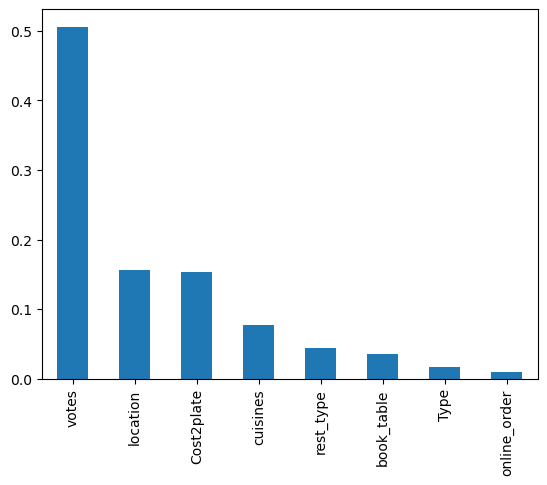

In [162]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [163]:
X_imp = X[feat_importances.nlargest(5).index]
X_imp

votes  location  Cost2plate  cuisines  rest_type
0      0.436734 -1.517926    0.480266  0.596164  -1.212980
1      0.449461 -1.517926    0.480266  0.596164  -1.212980
2      0.588399 -1.517926    0.480266  0.596164   1.287250
3     -0.291896 -1.517926   -0.651572  0.234144   0.287158
4     -0.209170 -1.261047    0.027531  0.596164  -1.212980
...         ...       ...         ...       ...        ...
34723 -0.356593  1.307751    2.064841  0.596164   1.287250
34724 -0.385229  1.307751    0.027531 -1.093264   1.287250
34725 -0.385229  1.307751    3.196679 -1.093264   1.287250
34726 -0.134928  1.393377    4.328518 -1.093264   1.287250
34727 -0.371441  1.393377    2.064841  0.596164   1.287250

[34728 rows x 5 columns]

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [165]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.37009574544669 

Test Accuracy:- 94.35646415202996 

confusion_matrix:- 
 [[  166     0     0     0]
 [    4  7431    44     0]
 [    2   124 19559     0]
 [    0     0     1   451]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       166
           1       0.98      0.99      0.99      7479
           2       1.00      0.99      1.00     19685
           3       1.00      1.00      1.00       452

    accuracy                           0.99     27782
   macro avg       0.99      1.00      0.99     27782
weighted avg       0.99      0.99      0.99     27782



# hyperparameters

In [176]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [167]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [168]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [169]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [173]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [174]:
DM = DecisionTreeClassifier(criterion='log_loss',min_samples_split= 15,min_samples_leaf= 1,max_features= 'auto',max_depth= 47)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 92.38715715211288 

Test Accuracy:- 88.20904117477684 

confusion_matrix:- 
 [[  102    22    42     0]
 [   37  6588   854     0]
 [   33  1018 18617    17]
 [    0     0    92   360]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       166
           1       0.86      0.88      0.87      7479
           2       0.95      0.95      0.95     19685
           3       0.95      0.80      0.87       452

    accuracy                           0.92     27782
   macro avg       0.84      0.81      0.82     27782
weighted avg       0.92      0.92      0.92     27782



# Random Forest Algorithm

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.61125908861852 

Test Accuracy:- 91.88021883098186 

confusion_matrix:- 
 [[  163     2     1     0]
 [    2  7434    43     0]
 [    0    60 19625     0]
 [    0     0     0   452]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       166
           1       0.99      0.99      0.99      7479
           2       1.00      1.00      1.00     19685
           3       1.00      1.00      1.00       452

    accuracy                           1.00     27782
   macro avg       0.99      0.99      0.99     27782
weighted avg       1.00      1.00      1.00     27782



# Feature Selection Technique

In [181]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [182]:
print(selection.feature_importances_)

[0.0215579  0.0678063  0.48120305 0.15161265 0.05680005 0.07079017
 0.13752239 0.01270749]


In [183]:

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

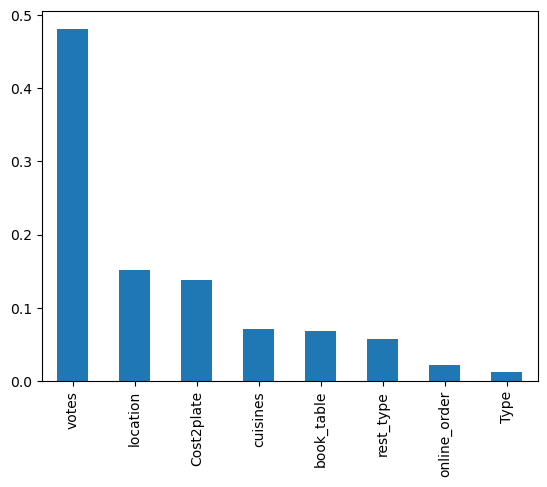

In [184]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [185]:
X_imp = X[feat_importances.nlargest(5).index]

In [186]:
X_imp

votes  location  Cost2plate  cuisines  book_table
0      0.436734 -1.517926    0.480266  0.596164   -2.344889
1      0.449461 -1.517926    0.480266  0.596164    0.426459
2      0.588399 -1.517926    0.480266  0.596164    0.426459
3     -0.291896 -1.517926   -0.651572  0.234144    0.426459
4     -0.209170 -1.261047    0.027531  0.596164    0.426459
...         ...       ...         ...       ...         ...
34723 -0.356593  1.307751    2.064841  0.596164    0.426459
34724 -0.385229  1.307751    0.027531 -1.093264    0.426459
34725 -0.385229  1.307751    3.196679 -1.093264    0.426459
34726 -0.134928  1.393377    4.328518 -1.093264   -2.344889
34727 -0.371441  1.393377    2.064841  0.596164    0.426459

[34728 rows x 5 columns]

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [188]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 98.83377726585559 

Test Accuracy:- 94.29887705154046 

confusion_matrix:- 
 [[  165     1     0     0]
 [    4  7325   150     0]
 [    2   165 19518     0]
 [    0     0     2   450]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       166
           1       0.98      0.98      0.98      7479
           2       0.99      0.99      0.99     19685
           3       1.00      1.00      1.00       452

    accuracy                           0.99     27782
   macro avg       0.98      0.99      0.99     27782
weighted avg       0.99      0.99      0.99     27782



# hyperparameters

In [189]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [190]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [191]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [192]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [193]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [194]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 93.90252681592398 

Test Accuracy:- 89.93665418946156 

confusion_matrix:- 
 [[   24    15   127     0]
 [    0  6493   986     0]
 [    0   456 19227     2]
 [    0     0   108   344]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      0.14      0.25       166
           1       0.93      0.87      0.90      7479
           2       0.94      0.98      0.96     19685
           3       0.99      0.76      0.86       452

    accuracy                           0.94     27782
   macro avg       0.97      0.69      0.74     27782
weighted avg       0.94      0.94      0.94     27782



In [195]:
models = ["Logistic Regression Train", "Logistic Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [70,70, 99,94, 94,90]


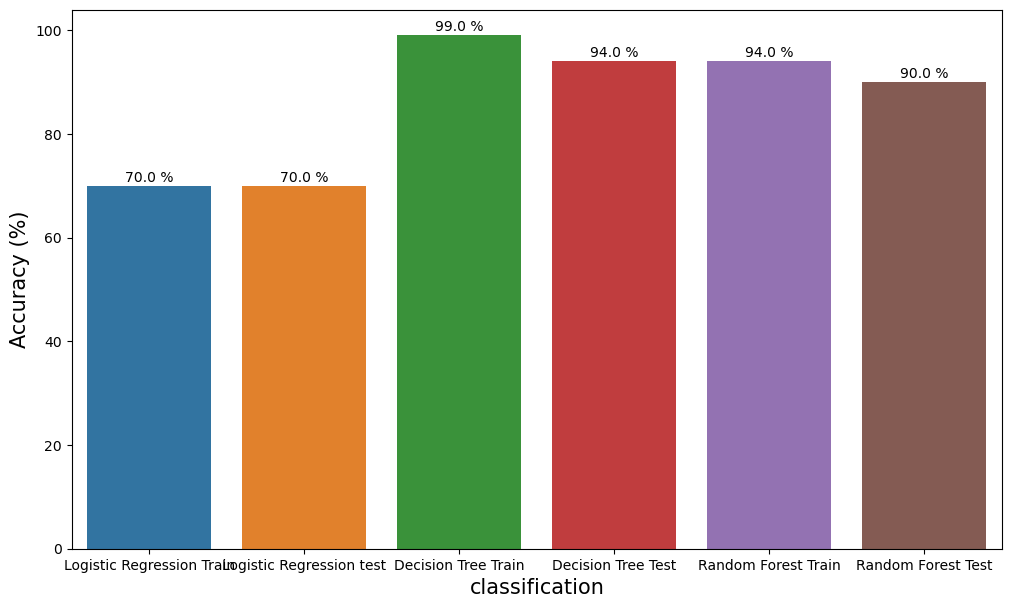

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()